In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch
#import pyam

#data_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Data/"
data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"

pd.set_option('display.max_columns', 500)

In [2]:
#uploading data 
equity_remind=pd.read_excel(data_path+'REMIND_equity_analysis.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_analysis.xls')
allmodels_df=pd.read_excel(data_path+'MASTERDF_equity_analysis.xls') #master datafram with all regions from IMAGE and REMIND
allmodels_equal_df=pd.read_excel(data_path+'allmodels_df.xls') #consolidated with REMIND regions

In [3]:
regions_rem = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA', 'World']
regions_ima = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU', 'World']
#regions_mes = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS', 'USA', 'World']

regions_rem_noworld = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA']
regions_ima_noworld = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU']
#regions_mes_noworld = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS',  'USA']

In [89]:
#why the differences do not add up to 0??
#sum of all regions BECCS ~= world BECCS
# print(equity_image.loc[(equity_image.Region==("World"))&(equity_image.Scenario==("SSP1-19-SPA0-V17"))&(equity_image.Year==(2060))]["BECCS"])
# print(equity_image.loc[(equity_image.Region.isin(regions_ima_noworld))&(equity_image.Scenario==("SSP1-19-SPA0-V17"))&(equity_image.Year==(2060))]["BECCS"].sum())

print(equity_remind.loc[(equity_remind.Region==("World"))&(equity_remind.Scenario==("SSP2-19-SPA2-V17"))&(equity_remind.Year==(2080))]["BECCS"])
print(equity_remind.loc[(equity_remind.Region.isin(regions_rem_noworld))&(equity_remind.Scenario==("SSP2-19-SPA2-V17"))&(equity_remind.Year==(2080))]["BECCS"].sum())


213    15420.0
Name: BECCS, dtype: float64
15415.599999999999


In [68]:
#adding each year's investment differences should add up to 0 (w/o world) - but depends on the sceanario? why??
# equity_image.loc[(equity_image.Year==2050)
#                  &(equity_image.Scenario==('SSP2-Ref-SPA0-V17'))
#                  &(equity_image.Region.isin(regions_ima_noworld))]['CUM_BECCS_invest_model_vs_FairShare_by_POP'].sum()

equity_image.loc[(equity_image.Year==2070)
                 &(equity_image.Scenario==('SSP1-19-SPA0-V17'))
                 &(equity_image.Region.isin(regions_ima_noworld))]['CUM_BECCS_model_vs_fair_share_by_GDP'].sum()

#equity_image.loc[(equity_image.Year==2100)]['CUM_BECCS_invest_model_vs_FairShare_by_GDP'].sum()


4.715225982465654e-05

# Transfer tables & bar graphs

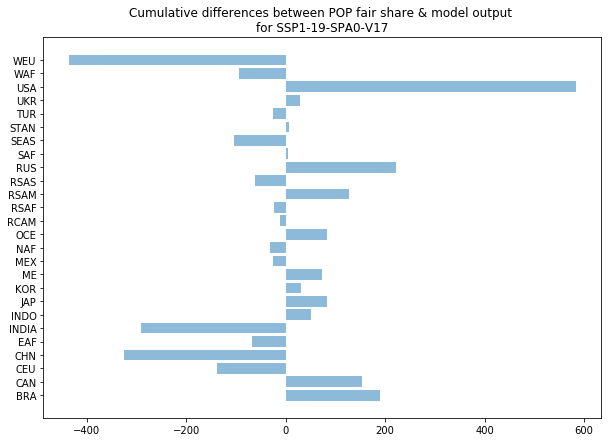

<Figure size 432x288 with 0 Axes>

In [80]:
#bar plot for each model for cumulative differences 
regions=regions_ima_noworld
y_axis=np.arange(len(regions_ima_noworld))
cum_invest=equity_image.loc[(equity_image.Year==2100)
                            &(equity_image.Scenario==('SSP1-19-SPA0-V17'))
                            &(equity_image.Region.isin(regions_ima_noworld))]['CUM_BECCS_invest_model_vs_FairShare_by_POP']

plt.figure(figsize=(10,7))
plt.barh(y_axis, cum_invest, align='center', alpha=0.5)
plt.yticks(y_axis, regions)
plt.title('Cumulative differences between POP fair share & model output \nfor SSP1-19-SPA0-V17')

plt.show()
#plt.savefig(plot_path + 'horizontal_bar_BECCS_invest_diff.png', bbox_inches='tight')


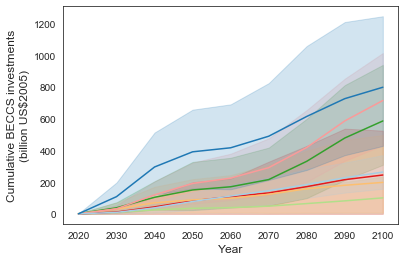

In [65]:
sns.set_style('white')
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM','RUS','USA']
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))]
sns.lineplot(x='Year',y='CUM_BECCS_Investments',
             data=data, 
             palette=colour_palette, hue="Region",
             legend=False)
plt.ylabel('Cumulative BECCS investments\n(billion US$2005)', fontsize = 12)
plt.xlabel('Year', fontsize=12)
plt.savefig(plot_path + 'CUM_BECCS_investments_by_region.png',bbox_inches="tight")

In [25]:
allmodels_df.loc[(allmodels_df.Region==('World'))&(allmodels_df.Year==(2100))]['CUM_BECCS']

242      477250.36
485      798252.96
647      655172.36
755      896771.85
863      422384.16
971      618246.35
1079    1178542.01
1187     918936.01
Name: CUM_BECCS, dtype: float64

Text(0.5, 0, 'Year')

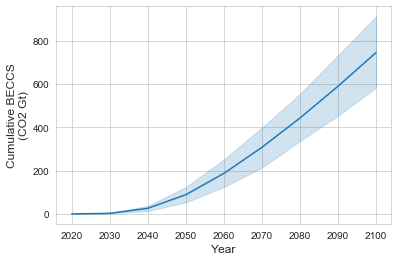

In [27]:
data=allmodels_df.loc[(allmodels_df.Region==('World'))].copy()
data['CUM_BECCS']=data['CUM_BECCS']*10**-3

sns.lineplot(x='Year',y='CUM_BECCS',
             data=data, 
             palette=colour_palette, 
             #hue="Region",
             legend=False)
plt.ylabel('Cumulative BECCS\n(CO2 Gt)', fontsize = 12)
plt.xlabel('Year', fontsize=12)
#plt.savefig(plot_path + 'CUM_BECCS_by_region.png',bbox_inches="tight")

In [4]:
#boxplot_df_allmodels 
sns.set_style('white')
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM','RUS','USA']
#why doesn't the color palette go through??

g = sns.relplot(x="Year", y="value", 
                hue="Region",
                hue_order=['AFR','CHN','EUR','IND','LAM','RUS','USA'],
                palette=colour_palette,
                col= 'variable',
                col_order= ['BECCS','CUM_BECCS','BECCS_Investments','CUM_BECCS_Investments'],
                col_wrap=2,
                kind='line', 
                data=relplot_data,
                facet_kws={'sharey': False, 'sharex': True})

#g.axes[0][0].set_title('BECCS over time')



NameError: name 'relplot_data' is not defined

# BECCS amount transferred in CO2 Gt

In [5]:
allmodels_df.head(10)

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,BECCS_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,BECCS_invest_model_vs_FairShare_by_POP,BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_invest_model_vs_FairShare_by_POP,CUM_BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP
0,0,IMAGE,BRA,SSP1-19-SPA0-V17,2020,1027.14,1669.13,6.40,-175.24,0.00,1669.13,49348.87,0.00,6.40,Mt/yr,0.15,0.15,billion US$2005/yr,90.46,208.36,2679717.04,Mio,5745.05,1376.24,1.21,USD Million,12861.08,13439.00,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.06,34817.40,14531.47,0.03,41.13,2.94,41.13,2.94,41.13,0.00,41.13,0.00,1.07,1.07,-3.46,-6.40,0.92,-0.15,0.92,-0.15,-3.46,-6.40
1,1,IMAGE,BRA,SSP1-19-SPA0-V17,2030,454.39,1031.94,28.67,-121.85,0.00,1031.94,62854.22,0.00,181.74,Mt/yr,0.72,4.51,billion US$2005/yr,359.17,215.94,3829077.88,Mio,7866.55,1376.24,0.75,USD Million,17731.95,19332.18,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.65,44449.32,18404.90,0.04,114.37,56.15,826.27,298.91,114.37,0.00,826.27,0.00,2.54,19.29,27.48,-28.67,1.82,-0.72,13.66,-4.36,120.09,-175.34
2,2,IMAGE,BRA,SSP1-19-SPA0-V17,2040,700.05,1324.44,53.87,-183.31,0.00,1324.44,74636.12,0.00,594.46,Mt/yr,0.28,9.53,billion US$2005/yr,429.45,218.08,5331477.05,Mio,10036.64,1376.24,0.96,USD Million,24447.76,26606.49,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.03,50486.92,24149.20,0.04,213.23,143.37,2690.85,1390.44,213.23,0.00,2690.85,0.00,1.20,43.18,89.50,-53.87,0.92,-0.28,27.35,-9.38,704.97,-588.06
3,3,IMAGE,BRA,SSP1-19-SPA0-V17,2050,142.48,703.76,71.84,14.96,86.79,790.55,85211.09,433.97,1223.00,Mt/yr,0.30,12.42,billion US$2005/yr,444.23,214.99,6912486.82,Mio,12202.00,1376.24,0.57,USD Million,32151.88,34148.22,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.45,54305.70,30905.38,0.05,311.81,193.38,6007.59,3462.10,225.01,-86.79,5573.62,-433.97,1.89,67.70,121.55,-71.84,1.59,-0.30,39.93,-12.27,1760.20,-1216.60
4,4,IMAGE,BRA,SSP1-19-SPA0-V17,2060,20.31,568.66,78.91,95.78,174.69,743.34,92880.56,1741.37,1976.72,Mt/yr,0.34,15.58,billion US$2005/yr,436.76,206.90,8386987.30,Mio,14311.48,1376.24,0.54,USD Million,40536.23,41955.26,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.99,57141.77,35738.80,0.05,432.85,266.09,10407.17,6155.34,258.16,-174.69,8665.81,-1741.37,2.58,96.94,187.18,-78.91,2.24,-0.34,59.12,-15.43,3303.87,-1970.32
5,5,IMAGE,BRA,SSP1-19-SPA0-V17,2070,-206.55,349.49,110.59,323.41,434.00,783.49,100514.76,4784.82,2924.23,Mt/yr,0.50,19.77,billion US$2005/yr,379.72,194.77,9572494.14,Mio,16319.84,1376.24,0.57,USD Million,49147.13,50523.40,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.65,59597.61,40917.15,0.06,606.10,396.33,16705.45,10124.54,172.10,-434.00,11920.63,-4784.82,4.04,139.66,285.73,-110.59,3.53,-0.50,88.00,-19.62,5668.45,-2917.83
6,6,IMAGE,BRA,SSP1-19-SPA0-V17,2080,-527.84,27.45,179.11,519.86,698.97,726.42,108064.32,10449.70,4372.77,Mt/yr,0.43,24.44,billion US$2005/yr,280.65,179.67,10475839.84,Mio,18192.05,1376.24,0.53,USD Million,58306.30,59670.65,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [6]:
BECCS_variables=['BECCS','BECCS_model_vs_fair_share_by_CUM_POP','BECCS_model_vs_fair_share_by_GDP', 
                 'CUM_BECCS','CUM_BECCS_model_vs_fair_share_by_CUM_POP', 'CUM_BECCS_model_vs_fair_share_by_GDP']

In [11]:
#allmodels_df.loc[(allmodels_df.Year==2100)&(allmodels_df.Region==('IND'))][BECCS_variables]

In [12]:
#total transfer amount of BECCS
def total_excess_BECCS_by_GDP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_model_vs_fair_share_by_GDP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_by_GDP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_model_vs_fair_share_by_GDP'].sum()
    return(tot_exs_BECCS_by_GDP)

def total_excess_BECCS_by_CUM_POP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_model_vs_fair_share_by_CUM_POP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_by_CUM_POP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_model_vs_fair_share_by_CUM_POP'].sum()
    return(tot_exs_BECCS_by_CUM_POP)

In [13]:
def total_world_CUM_BECCS(equity_df, scenario):
    sfilt = (equity_df.Scenario == scenario)
    rfilt = (equity_df.Region != 'World')
    yfilt = (equity_df.Year == 2100)
    
    total_world_CUM_BECCS = equity_df.loc[sfilt&rfilt&yfilt, 'CUM_BECCS'].sum()
    #total_world_CUM_CDRXPrice = equity_df.loc[sfilt&rfilt&yfilt][['Year','Region','CUM_PriceXTotalCDR']]
   
    return (total_world_CUM_BECCS)


In [40]:
total_excess_BECCS_by_GDP(equity_image, 'SSP2-LF-SPA2-V17')

315033.9031940084

In [51]:
equity_image.Scenario.unique()

array(['SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17'], dtype=object)

In [20]:
def BECCS_transferred_by_scenario(equity_df):
    new_df = pd.DataFrame(columns=['Model','AP','CPCE','2100_Total','Unit'])
    
    #new_df['Model'] = equity_df['MODEL']
    #new_df['Unit']= 'CO2 Gt'
    for scen in equity_df.Scenario.unique(): #['SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17']
        new_df.loc[scen,'AP']= total_excess_BECCS_by_GDP(equity_df, scen).round(2)*10**-3
        new_df.loc[scen,'CPCE']= total_excess_BECCS_by_CUM_POP(equity_df, scen).round(2)*10**-3
        new_df.loc[scen,'2100_Total']=total_world_CUM_BECCS(equity_df, scen).round(2)*10**-3
        new_df.loc[scen,'Model']=equity_df['MODEL'][1]
        new_df.loc[scen,'Unit']= 'CO2 Gt'  
    
    return new_df

In [21]:
BECCS_transferred_by_scenario(equity_image)

,Model,AP,CPCE,2100_Total,Unit
SSP1-19-SPA0-V17,IMAGE,192.759,144.138,477.25,CO2 Gt
SSP2-LF-SPA2-V17,IMAGE,315.034,277.872,798.253,CO2 Gt


In [37]:
BECCS_transferred_image=BECCS_transferred_by_scenario(equity_image)

In [38]:
BECCS_transferred_remind=BECCS_transferred_by_scenario(equity_remind)

In [41]:
BECCS_transferred_allscens=pd.concat([BECCS_transferred_image,BECCS_transferred_remind]
                                    ).reset_index().rename(columns={"index": "Scenario"})
BECCS_transferred_allscens

,Scenario,Model,AP,CPCE,2100_Total,Unit
0,SSP1-19-SPA0-V17,IMAGE,192.759,144.138,477.25,CO2 Gt
1,SSP2-LF-SPA2-V17,IMAGE,315.034,277.872,798.253,CO2 Gt
2,SSP1-19-SPA1-V17,REMIND,239.078,304.868,655.138,CO2 Gt
3,SSP2-19-SPA2-V17,REMIND,328.216,351.814,896.708,CO2 Gt
4,SSP1-26-SPA1-V17,REMIND,161.076,198.098,422.372,CO2 Gt
5,SSP2-26-SPA2-V17,REMIND,216.036,241.486,618.308,CO2 Gt
6,SSP5-19-SPA5-V17,REMIND,422.531,502.704,1178.46,CO2 Gt
7,SSP5-26-SPA5-V17,REMIND,320.327,385.229,918.855,CO2 Gt


In [43]:
BECCS_transferred_allscens.loc[:,'Difference_AP'
                              ]=BECCS_transferred_allscens.loc[:,'2100_Total']-BECCS_transferred_allscens.loc[:,'AP']
BECCS_transferred_allscens.loc[:,'Difference_CPCE'
                              ]=BECCS_transferred_allscens.loc[:,'2100_Total']-BECCS_transferred_allscens.loc[:,'CPCE']

In [60]:
BECCS_transferred_allscens.to_excel(data_path + 'BECCS_transferred_allscens.xls')

In [8]:
BECCS_transferred_allscens=pd.read_excel(data_path + 'BECCS_transferred_allscens.xls')

In [8]:
BECCS_transferred_allscens

,Unnamed: 0,Scenario,Model,AP,CPCE,2100_Total,Unit,Difference_AP,Difference_CPCE
0,0,SSP1-19-SPA0-V17,IMAGE,192.75930,144.13781,477.25034,CO2 Gt,284.49104,333.11253
1,1,SSP2-LF-SPA2-V17,IMAGE,315.03390,277.87199,798.25293,CO2 Gt,483.21903,520.38094
2,2,SSP1-19-SPA1-V17,REMIND,239.07810,304.86849,655.13768,CO2 Gt,416.05958,350.26919
3,3,SSP2-19-SPA2-V17,REMIND,328.21581,351.81370,896.70761,CO2 Gt,568.49180,544.89391
4,4,SSP1-26-SPA1-V17,REMIND,161.07594,198.09762,422.37197,CO2 Gt,261.29603,224.27435
5,5,SSP2-26-SPA2-V17,REMIND,216.03617,241.48625,618.30801,CO2 Gt,402.27184,376.82176
6,6,SSP5-19-SPA5-V17,REMIND,422.53084,502.70387,1178.46261,CO2 Gt,755.93177,675.75874
7,7,SSP5-26-SPA5-V17,REMIND,320.32708,385.22910,918.85490,CO2 Gt,598.52782,533.62580


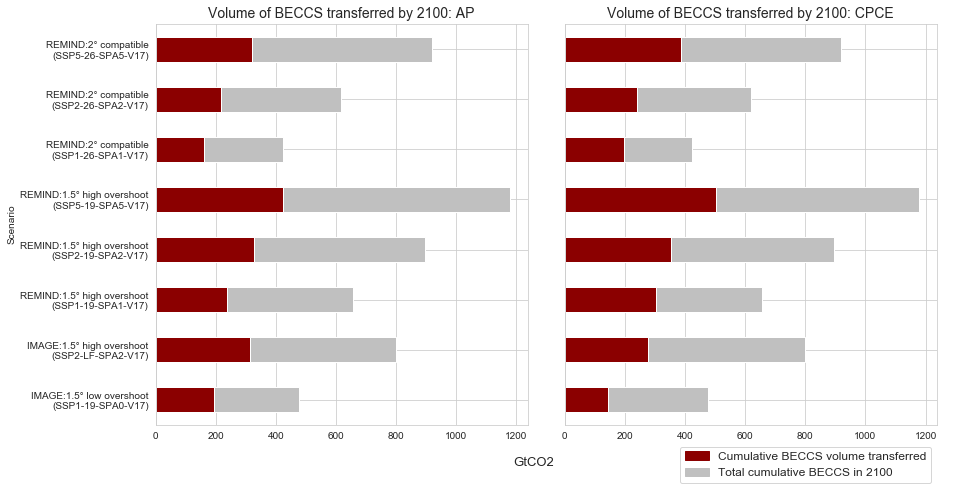

In [6]:
sns.set_style('whitegrid')
scen_order = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
columns_GDP = ['Scenario','Model','AP','Difference_AP']
columns_CUM_POP = ['Scenario','Model','CPCE','Difference_CPCE']

#Make it horizontal
fig, axes = plt.subplots(1, 2, figsize=(14,7), sharey=True)
plt.subplots_adjust(top=0.92, wspace=0.1, hspace = 0.12)
#plt.suptitle('BECCSXPrice transferred by 2100', fontsize = 14)

df_forplot=BECCS_transferred_allscens.loc[:,(columns_GDP)].set_index("Scenario").loc[scen_order].reset_index()
df_forplot2=BECCS_transferred_allscens.loc[:,(columns_CUM_POP)].set_index("Scenario").loc[scen_order].reset_index()
#ax1=plt.bar(x='Scenario', data=df_forplot, stacked=True, ax=axes[0]).set_title('$ tranferred: by GDP', fontsize = 11)
#plt.legend(labels=['BECCSXPrice Transferred:AP', 'BECCSXPrice World Total 2100'])
ax1=df_forplot.plot.barh(x='Scenario', stacked=True, ax=axes[0], legend=None, color=['darkred','silver']).set_title('Volume of BECCS transferred by 2100: AP', fontsize = 14)
ax2=df_forplot2.plot.barh(x='Scenario', stacked=True, ax=axes[1], legend=None, color=['darkred','silver']).set_title('Volume of BECCS transferred by 2100: CPCE', fontsize = 14)
#ax1.legend(labels=['BECCSXPrice Transferred:CPCE', 'BECCSXPrice World Total 2100'])
#plt.xlabel('GtCO2')
plt.yticks([0,1,2,3,4,5,6,7], ['IMAGE:1.5° low overshoot\n(SSP1-19-SPA0-V17)','IMAGE:1.5° high overshoot\n(SSP2-LF-SPA2-V17)',
                           'REMIND:1.5° high overshoot\n(SSP1-19-SPA1-V17)','REMIND:1.5° high overshoot\n(SSP2-19-SPA2-V17)',
                          'REMIND:1.5° high overshoot\n(SSP5-19-SPA5-V17)','REMIND:2° compatible\n(SSP1-26-SPA1-V17)',
                               'REMIND:2° compatible\n(SSP2-26-SPA2-V17)','REMIND:2° compatible\n(SSP5-26-SPA5-V17)'],
           fontsize=13)#, rotation=45, ha='right')
plt.ylabel(' ')

fig.text(0.5, 0.05, 'GtCO2', fontsize=13, ha='center', va='center')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='darkred', label='Cumulative BECCS volume transferred')
gray_patch = mpatches.Patch(color='silver', label='Total cumulative BECCS in 2100')
plt.figlegend(handles=[red_patch,gray_patch],
              loc='lower right', bbox_to_anchor=(0.93, 0), fontsize=12)

plt.savefig(plot_path + 'V_BECCS_transferred_2100.png', bbox_inches='tight')
#ax = df_forplot.set_index("Scenario").loc[scen_order].plot.barh(stacked = True)


In [32]:
scen_allmodels = ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17']
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17','SSP2-19-SPA2-V17'] # 1.5 high overshoot
scen_15_all= ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17',
       'SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2° scens

BECCS_transferred_allscens['pathway']=0
BECCS_transferred_allscens.loc[BECCS_transferred_allscens.Scenario.isin(scen_2),'pathway']='2°C pathways'
BECCS_transferred_allscens.loc[BECCS_transferred_allscens.Scenario.isin(scen_15_all),'pathway']='End-century\n1.5°C pathways'

In [10]:
BECCS_transferred_allscens

,Unnamed: 0,Scenario,Model,AP,Share: AP,CPCE,Share: CPCE,2100_Total,Unit,Difference_AP,Difference_CPCE,pathway
0,0,SSP1-19-SPA0-V17,IMAGE,192.75930,40.389557,144.13781,30.201720,477.25034,CO2 Gt,284.49104,333.11253,1.5°C pathways
1,1,SSP2-LF-SPA2-V17,IMAGE,315.03390,39.465424,277.87199,34.810018,798.25293,CO2 Gt,483.21903,520.38094,1.5°C pathways
2,2,SSP1-19-SPA1-V17,REMIND,239.07810,36.492803,304.86849,46.535026,655.13768,CO2 Gt,416.05958,350.26919,1.5°C pathways
3,3,SSP2-19-SPA2-V17,REMIND,328.21581,36.602322,351.81370,39.233937,896.70761,CO2 Gt,568.49180,544.89391,1.5°C pathways
4,4,SSP1-26-SPA1-V17,REMIND,161.07594,38.136039,198.09762,46.901223,422.37197,CO2 Gt,261.29603,224.27435,2°C pathways
5,5,SSP2-26-SPA2-V17,REMIND,216.03617,34.939895,241.48625,39.055980,618.30801,CO2 Gt,402.27184,376.82176,2°C pathways
6,6,SSP5-19-SPA5-V17,REMIND,422.53084,35.854412,502.70387,42.657600,1178.46261,CO2 Gt,755.93177,675.75874,1.5°C pathways
7,7,SSP5-26-SPA5-V17,REMIND,320.32708,34.861552,385.22910,41.924911,918.85490,CO2 Gt,598.52782,533.62580,2°C pathways


In [33]:
# Prepare data for boxplots - long form

boxplot_df_BECCS_transferred = BECCS_transferred_allscens.melt(id_vars=['Model','Scenario', 'pathway'], 
                                                               value_vars=['AP','CPCE'])#.reset_index()

boxplot_df_BECCS_transferred

,Model,Scenario,pathway,variable,value
0,IMAGE,SSP1-19-SPA0-V17,End-century\n1.5°C pathways,AP,192.75930
1,IMAGE,SSP2-LF-SPA2-V17,End-century\n1.5°C pathways,AP,315.03390
2,REMIND,SSP1-19-SPA1-V17,End-century\n1.5°C pathways,AP,239.07810
3,REMIND,SSP2-19-SPA2-V17,End-century\n1.5°C pathways,AP,328.21581
4,REMIND,SSP1-26-SPA1-V17,2°C pathways,AP,161.07594
5,REMIND,SSP2-26-SPA2-V17,2°C pathways,AP,216.03617
6,REMIND,SSP5-19-SPA5-V17,End-century\n1.5°C pathways,AP,422.53084
7,REMIND,SSP5-26-SPA5-V17,2°C pathways,AP,320.32708
8,IMAGE,SSP1-19-SPA0-V17,End-century\n1.5°C pathways,CPCE,144.13781
9,IMAGE,SSP2-LF-SPA2-V17,End-century\n1.5°C pathways,CPCE,277.87199


(100, 1300)

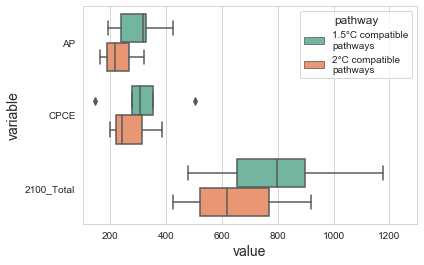

In [93]:
ax = sns.boxplot(x='value', y='variable', hue='pathway',data=boxplot_df_BECCS_transferred, 
                 order=['AP', 'CPCE','2100_Total'], orient="h", palette="Set2")
ax.set_xlim([100,1300])


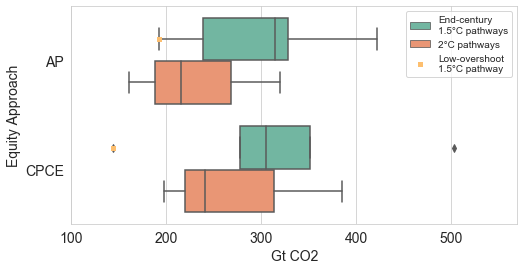

In [34]:
#Box plot by pathways
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6]]

plt.figure(figsize=(8,4))
box2100=sns.boxplot(
    data = boxplot_df_BECCS_transferred,
    x = 'value', 
    y = 'variable',
    hue = 'pathway',
    hue_order=['End-century\n1.5°C pathways', '2°C pathways'],
    palette="Set2",
    orient="h")

data_15 = boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.Scenario.isin(scen_15_lo)]

box2100=sns.swarmplot(data=data_15,
                      x = 'value',
                      y = 'variable',
                      palette='Spectral',
                      hue = 'pathway',
                      hue_order=['End-century\n1.5°C pathways', '2°C pathways'],
                      orient="h",
                      label="Low-overshoot\n1.5°C pathway",
                      marker = 's',
                      facecolors='none',
                      dodge = True)

box2100.set(ylabel="Equity Approach",xlabel = "Gt CO2")
box2100.set(yticklabels=['AP','CPCE'])
box2100.tick_params(labelsize=14)
#box2100.set_title("Cumulative CDR transferred by 2100", fontsize=17)

handles, labels = box2100.get_legend_handles_labels()
box2100.legend(loc='upper right')
box2100.legend(handles=handles[:3],
               labels=labels[:3])
#box2100.legend(labels=['likely above\n1.5°C pathways', '2°C compatible\npathways','1.5°C compatible\npathway'])

box2100.set_xlim([100,570])
plt.savefig(plot_path + 'Boxplot-cum_CDR_transferred_2100.png',bbox_inches="tight")

In [143]:
boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.variable==('AP')].value.describe()

count      8.000000
mean     274.382142
std       86.817390
min      161.075940
25%      210.216952
50%      277.056000
75%      322.299262
max      422.530840
Name: value, dtype: float64

In [142]:
boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.variable==('CPCE')].value.describe()

count      8.000000
mean     300.776104
std      113.166771
min      144.137810
25%      230.639093
50%      291.370240
75%      360.167550
max      502.703870
Name: value, dtype: float64

In [138]:
boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.variable==('AP')].groupby(['pathway']).value.describe()

,count,mean,std,min,25%,50%,75%,max
pathway,,,,,,,,
1.5°C compatible\npathways,5.0,299.52359,88.383918,192.75930,239.078100,315.03390,328.215810,422.53084
2°C compatible\npathways,3.0,232.47973,80.888963,161.07594,188.556055,216.03617,268.181625,320.32708


In [139]:
boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.variable==('CPCE')].groupby(['pathway']).value.describe()

,count,mean,std,min,25%,50%,75%,max
pathway,,,,,,,,
1.5°C compatible\npathways,5.0,316.279172,129.667685,144.13781,277.871990,304.86849,351.813700,502.70387
2°C compatible\npathways,3.0,274.937657,97.947921,198.09762,219.791935,241.48625,313.357675,385.22910


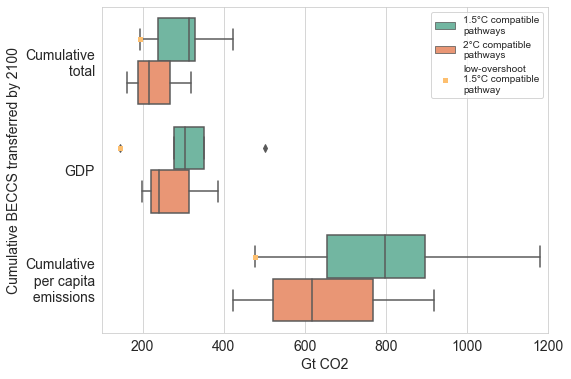

In [106]:
#box plot with 2100 cum total
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

plt.figure(figsize=(8,6))
box2100=sns.boxplot(
    data = boxplot_df_BECCS_transferred,
    x = 'value', 
    y = 'variable',
    hue = 'pathway',
    hue_order=['1.5°C compatible\npathways', '2°C compatible\npathways'],
    palette="Set2",
    order=['AP','CPCE','2100_Total'],
    orient="h")

data_15 = boxplot_df_BECCS_transferred.loc[boxplot_df_BECCS_transferred.Scenario.isin(scen_15_lo)]

box2100=sns.swarmplot(data=data_15,
                      x = 'value',
                      y = 'variable',
                      palette='Spectral',
                      hue = 'pathway',
                      hue_order=['1.5°C compatible\npathways', '2°C compatible\npathways'],
                      orient="h",
                      order=['AP','CPCE','2100_Total'],
                      label="low-overshoot\n1.5°C compatible\npathway",
                      marker = 's',
                      facecolors='none',
                      dodge = True)

box2100.set(ylabel="Cumulative BECCS transferred by 2100",xlabel = "Gt CO2")
box2100.set(yticklabels=['Cumulative\n total','GDP','Cumulative\n per capita\n emissions'])
box2100.tick_params(labelsize=14)

handles, labels = box2100.get_legend_handles_labels()
box2100.legend(loc='lower right')
box2100.legend(handles=handles[:3],
               labels=labels[:3])

#box2100.legend(labels=['likely above\n1.5°C pathways', '2°C compatible\npathways','1.5°C compatible\npathway'])

box2100.set_xlim([100,1200])
plt.savefig(plot_path + 'Boxplot-cum_BECCS_transferred_2100_w_total.png',bbox_inches="tight")

# Box plot - Cum BECCS investments: equity schemes vs. model output
## in order to see the dollar amount emerging countries would receive 

In [121]:
# Prepare data for boxplots - long form

boxplot_df_allmodels = allmodels_df.melt(id_vars=['MODEL', 'Region', 'Scenario', 'Year'], value_vars=['Total_CO2', 'BECCS', 'LANDCDR',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_BECCS','CUM_CDR', 'Unit_CO2',
       'Population', 'GDP', 'Unit_Population', 'cumPopulation', 'Unit_GDP',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP',
       'BECCS_fair_share_by_GDP','CUM_BECCS_fair_share_by_GDP', 
       'BECCS_fair_share_by_CUM_POP','CUM_BECCS_fair_share_by_CUM_POP', 
       'BECCS_model_vs_fair_share_by_CUM_POP','BECCS_model_vs_fair_share_by_GDP',
       'CUM_BECCS_model_vs_fair_share_by_CUM_POP','CUM_BECCS_model_vs_fair_share_by_GDP','BECCS_Investments',
       'CUM_BECCS_Investments','CUM_BECCS_Investments_by_POP',
       'CUM_BECCS_investments_by_GDP', 'BECCS_invest_model_vs_FairShare_by_POP',
       'BECCS_invest_model_vs_FairShare_by_GDP','CUM_BECCS_invest_model_vs_FairShare_by_POP',
       'CUM_BECCS_invest_model_vs_FairShare_by_GDP'])#.reset_index()

boxplot_df_allmodels

,MODEL,Region,Scenario,Year,variable,value
0,IMAGE,BRA,SSP1-19-SPA0-V17,2020,Total_CO2,1027.14
1,IMAGE,BRA,SSP1-19-SPA0-V17,2030,Total_CO2,454.39
2,IMAGE,BRA,SSP1-19-SPA0-V17,2040,Total_CO2,700.05
3,IMAGE,BRA,SSP1-19-SPA0-V17,2050,Total_CO2,142.48
4,IMAGE,BRA,SSP1-19-SPA0-V17,2060,Total_CO2,20.31
...,...,...,...,...,...,...
58207,REMIND,World,SSP5-26-SPA5-V17,2060,CUM_BECCS_invest_model_vs_FairShare_by_GDP,0
58208,REMIND,World,SSP5-26-SPA5-V17,2070,CUM_BECCS_invest_model_vs_FairShare_by_GDP,0
58209,REMIND,World,SSP5-26-SPA5-V17,2080,CUM_BECCS_invest_model_vs_FairShare_by_GDP,0
58210,REMIND,World,SSP5-26-SPA5-V17,2090,CUM_BECCS_invest_model_vs_FairShare_by_GDP,0


In [122]:
VariablesOI = ['CUM_BECCS_model_vs_fair_share_by_CUM_POP','CUM_BECCS_model_vs_fair_share_by_GDP',
              'CUM_BECCS_invest_model_vs_FairShare_by_POP','CUM_BECCS_invest_model_vs_FairShare_by_GDP']
scen_allmodels = ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17']
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17','SSP2-19-SPA2-V17'] # 1.5 high overshoot
scen_15_all= ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17',
       'SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2° scens


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


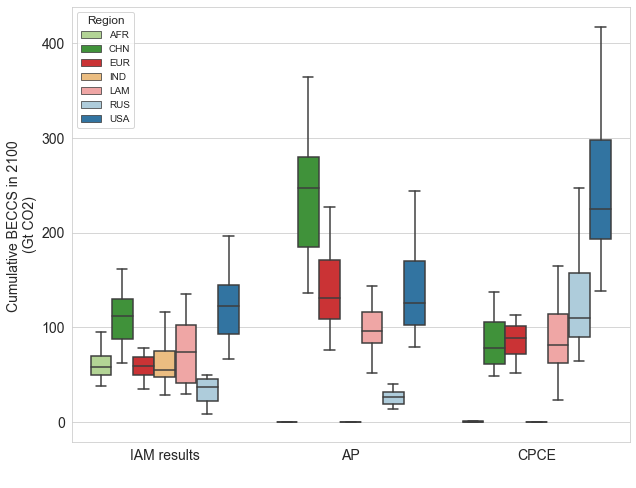

In [130]:
#Box plot 1- cumulative BECCS fair share in 2100
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM','RUS','USA']
variab = ['CUM_BECCS', 'CUM_BECCS_fair_share_by_GDP', 
          'CUM_BECCS_fair_share_by_CUM_POP']

boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(reg)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region',
    hue_order=['AFR','CHN','EUR','IND','LAM','RUS','USA'],
    palette=colour_palette,
    order=['CUM_BECCS', 'CUM_BECCS_fair_share_by_GDP', 
          'CUM_BECCS_fair_share_by_CUM_POP'],
    showfliers=False)

box2100.set(ylabel="Cumulative BECCS in 2100 \n(Gt CO2)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
# #box2100.legend(loc='upper right')
#box2100.set_ylim([-1000,2000])
#plt.savefig(plot_path + 'Boxplot-cum_BECCS_differences_2100.png',bbox_inches="tight")

In [132]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,61.726197,19.384361,37.77944,49.213833,58.297470,69.490318,94.82844
CHN,8.0,109.556809,32.604637,62.57494,87.166327,111.861630,129.723915,161.02304
EUR,8.0,58.149090,14.633283,34.53444,49.158432,59.467990,68.851948,77.81934
IND,8.0,62.523874,27.309273,28.59073,47.476492,54.822180,75.454720,116.03095
LAM,8.0,75.665249,38.391424,29.53589,41.525160,74.364520,102.444765,135.17724
RUS,8.0,33.492197,15.469219,8.24068,22.719667,37.278420,45.506618,49.92094
USA,8.0,123.185385,42.600896,66.82893,92.652960,122.234055,145.074138,196.61065


In [133]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_fair_share_by_GDP')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,1.098934,3.108254,0.00000,0.000000,0.000000,0.000000,8.79147
CHN,8.0,239.640574,74.280247,135.77952,184.444502,247.369615,279.448590,364.41793
EUR,8.0,139.497681,51.152689,76.15022,108.247187,131.004085,171.345505,226.76133
IND,8.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
LAM,8.0,98.113180,31.774502,51.74566,83.184573,95.740175,116.527965,144.01466
RUS,8.0,25.628808,9.491377,13.66748,18.685363,26.248110,31.790517,40.57602
USA,8.0,140.363912,56.637108,79.09867,102.843615,126.014000,169.485222,243.55706


In [134]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_fair_share_by_CUM_POP')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,1.783604,3.413777,0.00000,0.000000,0.000000,1.379435,8.75109
CHN,8.0,84.753928,30.170083,48.60475,61.399155,78.584295,105.601595,137.54430
EUR,8.0,85.345557,23.296788,51.60118,72.258480,89.131770,101.656053,112.84327
IND,8.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
LAM,8.0,90.429301,47.570100,23.34120,62.752430,81.164675,113.743838,164.24331
RUS,8.0,127.780346,61.105752,64.04649,90.036005,109.554865,157.443075,246.65529
USA,8.0,247.418181,92.766024,138.03048,193.011157,225.281530,298.047902,417.28287


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


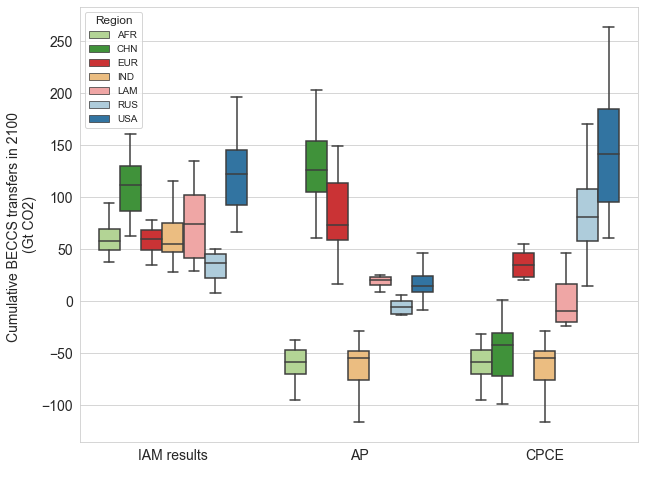

In [124]:
#Box plot 1- cumulative BECCS fair share in 2100
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM','RUS','USA']
variab = ['CUM_BECCS', 'CUM_BECCS_model_vs_fair_share_by_GDP', 
          'CUM_BECCS_model_vs_fair_share_by_CUM_POP']

boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(reg)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region',
    hue_order=['AFR','CHN','EUR','IND','LAM','RUS','USA'],
    palette=colour_palette,
    order=['CUM_BECCS', 'CUM_BECCS_model_vs_fair_share_by_GDP', 
          'CUM_BECCS_model_vs_fair_share_by_CUM_POP'],
    showfliers=False)

box2100.set(ylabel="Cumulative BECCS transfers in 2100 \n(Gt CO2)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
# #box2100.legend(loc='upper right')
#box2100.set_ylim([-1000,2000])
#plt.savefig(plot_path + 'Boxplot-cum_BECCS_differences_2100.png',bbox_inches="tight")

In [81]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_model_vs_fair_share_by_GDP')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,-60.626000,20.607628,-94.82843,-69.490308,-58.297460,-47.125550,-37.33102
CHN,8.0,130.084953,44.566628,61.08060,105.162000,125.840285,154.558530,203.39489
EUR,8.0,81.349283,43.156219,17.04458,59.135625,73.587255,113.586748,148.94200
IND,8.0,-62.522241,27.311587,-116.03095,-75.454720,-54.822170,-47.476483,-28.57771
LAM,8.0,22.449510,13.700481,8.83743,16.066140,20.165025,22.985185,53.62328
RUS,8.0,-7.863161,12.977659,-35.05420,-12.314837,-5.403220,0.274563,5.92481
USA,8.0,17.178869,18.804634,-8.32194,8.500820,15.202810,24.411298,46.94652


In [10]:
CHN_BECCS=allmodels_df.loc[(allmodels_df.Year==2100) & (allmodels_df.Region==('CHN'))
                ][['CUM_BECCS','CUM_BECCS_fair_share_by_GDP','CUM_BECCS_fair_share_by_CUM_POP']]

In [21]:
(CHN_BECCS['CUM_BECCS_fair_share_by_GDP']).median()

247369.615

In [14]:
EUR_BECCS=allmodels_df.loc[(allmodels_df.Year==2100) & (allmodels_df.Region==('EUR'))
                ][['CUM_BECCS','CUM_BECCS_fair_share_by_GDP','CUM_BECCS_fair_share_by_CUM_POP']]

In [22]:
(EUR_BECCS['CUM_BECCS_fair_share_by_GDP']).median()

131004.08499999999

In [16]:
USA_BECCS=allmodels_df.loc[(allmodels_df.Year==2100) & (allmodels_df.Region==('USA'))
                ][['CUM_BECCS','CUM_BECCS_fair_share_by_GDP','CUM_BECCS_fair_share_by_CUM_POP']]

In [23]:
(USA_BECCS['CUM_BECCS_fair_share_by_CUM_POP']).median()

225281.53

In [19]:
RUS_BECCS=allmodels_df.loc[(allmodels_df.Year==2100) & (allmodels_df.Region==('RUS'))
                ][['CUM_BECCS','CUM_BECCS_fair_share_by_GDP','CUM_BECCS_fair_share_by_CUM_POP']]

In [24]:
(RUS_BECCS['CUM_BECCS_fair_share_by_CUM_POP']).median()

109554.86499999999

In [13]:
allmodels_df.head(5)

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,BECCS_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,BECCS_invest_model_vs_FairShare_by_POP,BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_invest_model_vs_FairShare_by_POP,CUM_BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP
0,0,IMAGE,BRA,SSP1-19-SPA0-V17,2020,1027.14,1669.13,6.40,-175.24,0.00,1669.13,49348.87,0.00,6.40,Mt/yr,0.15,0.15,billion US$2005/yr,90.46,208.36,2679717.04,Mio,5745.05,1376.24,1.21,USD Million,12861.08,13439.00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.06,34817.40,14531.47,0.03,41.13,2.94,41.13,2.94,41.13,0.00,41.13,0.00,1.07,1.07,-3.46,-6.40,0.92,-0.15,0.92,-0.15,-3.46,-6.40
1,1,IMAGE,BRA,SSP1-19-SPA0-V17,2030,454.39,1031.94,28.67,-121.85,0.00,1031.94,62854.22,0.00,181.74,Mt/yr,0.72,4.51,billion US$2005/yr,359.17,215.94,3829077.88,Mio,7866.55,1376.24,0.75,USD Million,17731.95,19332.18,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.65,44449.32,18404.90,0.04,114.37,56.15,826.27,298.91,114.37,0.00,826.27,0.00,2.54,19.29,27.48,-28.67,1.82,-0.72,13.66,-4.36,120.09,-175.34
2,2,IMAGE,BRA,SSP1-19-SPA0-V17,2040,700.05,1324.44,53.87,-183.31,0.00,1324.44,74636.12,0.00,594.46,Mt/yr,0.28,9.53,billion US$2005/yr,429.45,218.08,5331477.05,Mio,10036.64,1376.24,0.96,USD Million,24447.76,26606.49,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.03,50486.92,24149.20,0.04,213.23,143.37,2690.85,1390.44,213.23,0.00,2690.85,0.00,1.20,43.18,89.50,-53.87,0.92,-0.28,27.35,-9.38,704.97,-588.06
3,3,IMAGE,BRA,SSP1-19-SPA0-V17,2050,142.48,703.76,71.84,14.96,86.79,790.55,85211.09,433.97,1223.00,Mt/yr,0.30,12.42,billion US$2005/yr,444.23,214.99,6912486.82,Mio,12202.00,1376.24,0.57,USD Million,32151.88,34148.22,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,54305.70,30905.38,0.05,311.81,193.38,6007.59,3462.10,225.01,-86.79,5573.62,-433.97,1.89,67.70,121.55,-71.84,1.59,-0.30,39.93,-12.27,1760.20,-1216.60
4,4,IMAGE,BRA,SSP1-19-SPA0-V17,2060,20.31,568.66,78.91,95.78,174.69,743.34,92880.56,1741.37,1976.72,Mt/yr,0.34,15.58,billion US$2005/yr,436.76,206.90,8386987.30,Mio,14311.48,1376.24,0.54,USD Million,40536.23,41955.26,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,57141.77,35738.80,0.05,432.85,266.09,10407.17,6155.34,258.16,-174.69,8665.81,-1741.37,2.58,96.94,187.18,-78.91,2.24,-0.34,59.12,-15.43,3303.87,-1970.32


In [17]:
#box plot2-corresponding table 


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(-1000, 2000)

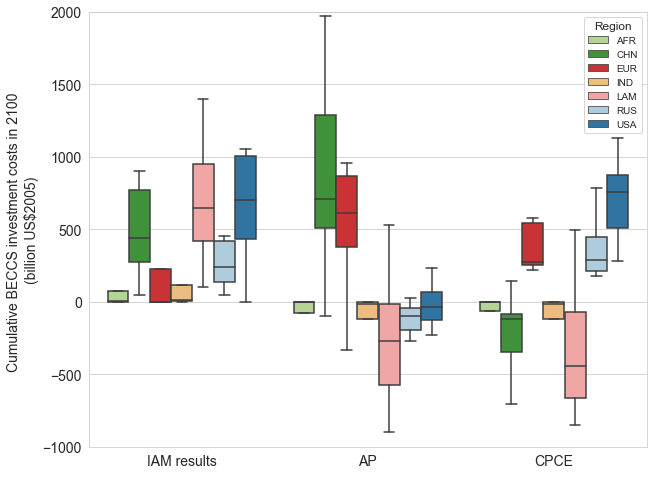

In [82]:
#Box plot 2 - cumulative differences in BECCS investments by 2100 
#Unit BECCS investments = billion $
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM','RUS','USA']
variab = ['CUM_BECCS_Investments', 'CUM_BECCS_invest_model_vs_FairShare_by_POP', 
          'CUM_BECCS_invest_model_vs_FairShare_by_GDP']

boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(reg)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region',
    hue_order=['AFR','CHN','EUR','IND','LAM','RUS','USA'],
    palette=colour_palette,
    order=['CUM_BECCS_Investments', 'CUM_BECCS_invest_model_vs_FairShare_by_GDP',
           'CUM_BECCS_invest_model_vs_FairShare_by_POP'],
    showfliers=False)


# boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
# boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
# boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]

# colours_15 = ["black"]
# pal_15 = sns.xkcd_palette(colours_15)
# colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
# pal_2 = sns.xkcd_palette(colours_2)

# box1 = sns.swarmplot(x='variable', y="value", data=boxp_2, 
#                      order = ['CUM_BECCS_Investments', 'CUM_BECCS_invest_model_vs_FairShare_by_POP', 'CUM_BECCS_invest_model_vs_FairShare_by_GDP'],
#                      hue = 'Region',palette= pal_15, marker = '*', 
#                      dodge = True, s=7, alpha=0.6)
# box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_ho, 
#                      hue = 'Region',
#                      order = ['CUM_BECCS_Investments', 'CUM_BECCS_invest_model_vs_FairShare_by_POP', 'CUM_BECCS_invest_model_vs_FairShare_by_GDP'],
#                      palette = pal_15, marker = 'd', dodge = True, s=6, alpha=0.6)
# box1 = sns.swarmplot(x='variable', y="value", data=boxp_15_lo,
#                      hue = 'Region',
#                      order = ['CUM_BECCS_Investments', 'CUM_BECCS_invest_model_vs_FairShare_by_POP','CUM_BECCS_invest_model_vs_FairShare_by_GDP'], 
#                      palette = pal_15, marker = 'o', dodge = True, s=6, alpha =0.6)

box2100.set(ylabel="Cumulative BECCS investment costs in 2100 \n(billion US$2005)",xlabel = " ")
box2100.set(xticklabels=['IAM results','AP','CPCE'])
box2100.tick_params(labelsize=14)
# #box2100.legend(loc='upper right')
box2100.set_ylim([-1000,2000])

#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
# from matplotlib.patches import Patch
# l = plt.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='Africa'),
#                            Patch(facecolor=colours[3], edgecolor='k', label='China'),
#                            Patch(facecolor=colours[5], edgecolor='k', label='Europe'),
#                            Patch(facecolor=colours[6], edgecolor='k', label='India'),
#                            Patch(facecolor=colours[4], edgecolor='k', label='Latin America'),
#                            Patch(facecolor=colours[0], edgecolor='k', label='Russia'),
#                            Patch(facecolor=colours[1], edgecolor='k', label='USA')], 
#                            fontsize = 11, 
#                             bbox_to_anchor =(1, 1))
# box1_legend=plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C lo', alpha=0.7),
#                          Line2D([0], [0], linestyle = 'none', marker = 'd', color="black", label = '1.5°C ho'),
#                 Line2D([0], [0], linestyle = 'none', marker = '*', color="black", label = '2°C')],
#                 bbox_to_anchor =(1, 0.73), fontsize = 11)    # bbox_to_anchor =(0.28, 0.9)/0.155, 0.68 <- for left side

# plt.gca().add_artist(l)
# plt.savefig(plot_path + 'Boxplot-cum_BECCS_investments_differences_2100.png',bbox_inches="tight")

In [83]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_Investments')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,101.14500,192.137099,0.01,0.0100,4.240,76.9100,512.23
CHN,8.0,585.83250,487.991055,44.05,277.2850,442.100,770.5050,1574.43
EUR,8.0,245.15125,455.143042,0.01,0.0100,0.015,228.4075,1049.30
IND,8.0,198.75750,416.727071,0.02,2.8475,15.120,119.0600,1200.07
LAM,8.0,714.68000,452.926607,105.61,421.9100,644.965,949.7150,1401.72
RUS,8.0,263.80875,162.378888,47.79,135.5400,241.260,417.3350,456.46
USA,8.0,798.26125,632.359546,0.69,436.6925,700.410,1004.0775,2117.54


In [84]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_invest_model_vs_FairShare_by_GDP')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,-91.51625,169.477499,-437.66,-76.2950,-4.240,-0.0100,-0.01
CHN,8.0,851.89250,659.748136,-95.19,508.8875,712.330,1292.1825,1971.55
EUR,8.0,540.05875,430.671804,-332.51,381.6750,612.435,867.2300,955.03
IND,8.0,-197.87500,415.561022,-1197.06,-118.0475,-15.120,-2.8475,-0.02
LAM,8.0,-254.38000,490.515232,-895.07,-570.7125,-267.260,-11.5475,529.43
RUS,8.0,-112.75250,107.873517,-269.99,-191.1450,-95.820,-43.6875,26.40
USA,8.0,-13.96250,270.387568,-426.85,-123.9825,-37.280,65.0250,463.66


In [86]:
boxp_2100.loc[boxp_2100.variable==('CUM_BECCS_invest_model_vs_FairShare_by_POP')].groupby(['Region']).value.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AFR,8.0,-74.29000,138.056608,-363.67,-60.3400,-4.240,-0.0100,-0.01
CHN,8.0,-205.44875,268.657057,-704.18,-348.5750,-120.715,-84.3375,145.05
EUR,8.0,267.09250,370.959767,-574.66,256.4950,275.140,542.0750,574.92
IND,8.0,-197.87500,415.561022,-1197.06,-118.0475,-15.120,-2.8475,-0.02
LAM,8.0,-314.15750,485.085526,-846.23,-661.8850,-439.655,-68.6275,498.93
RUS,8.0,370.77625,222.551609,176.22,213.6525,290.050,449.4025,787.47
USA,8.0,694.86125,299.524366,279.28,508.8425,755.360,875.0925,1129.89


In [11]:
boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region==('IND')) & 
                 (boxplot_df_allmodels.Year==(2100)) &
                 (boxplot_df_allmodels.variable==('CUM_BECCS_invest_model_vs_FairShare_by_GDP'))
                ]['value'].median()

-15.120000000000001

In [12]:
boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region==('IND')) & 
                 (boxplot_df_allmodels.Year==(2100)) &
                 (boxplot_df_allmodels.variable==('CUM_BECCS_invest_model_vs_FairShare_by_POP'))
                ]['value'].median()


-15.120000000000001

In [126]:
boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region==('USA')) & 
                 (boxplot_df_allmodels.Year==(2100)) &
                 (boxplot_df_allmodels.variable==('CUM_BECCS_Investments'))
                ]['value'].median()

700.4100000000001

In [117]:
(712.32-442.1)/442.1

0.6112191811807284

In [61]:
relplot_data=boxplot_df_allmodels.loc[boxplot_df_allmodels.variable.isin(['BECCS','BECCS_Investments',
                                                             'CUM_BECCS','CUM_BECCS_Investments']
                                                           )&(boxplot_df_allmodels.Region.isin(['AFR','CHN','EUR',
                                                                                                'IND','LAM', 'RUS', 'USA']))].copy()
relplot_data['value']=relplot_data['value'].astype(float)
relplot_data.loc[relplot_data.variable==('BECCS')]['value']=relplot_data.loc[relplot_data.variable==('BECCS')]['value']*10**-3
relplot_data.loc[relplot_data.variable==('CUM_BECCS')]['value']=relplot_data.loc[relplot_data.variable==('CUM_BECCS')]['value']*10**-3


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


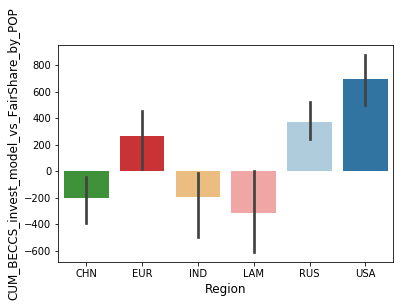

In [102]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))& (allmodels_equal_df.Year==2100)]
sns.barplot(x='Region',y='CUM_BECCS_invest_model_vs_FairShare_by_POP' ,data=data, palette=colour_palette) #hue="Scenario"
#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
#plt.savefig(plot_path + 'Bar - Share of BECCS in 2100 by region.png', bbox_inches='tight')

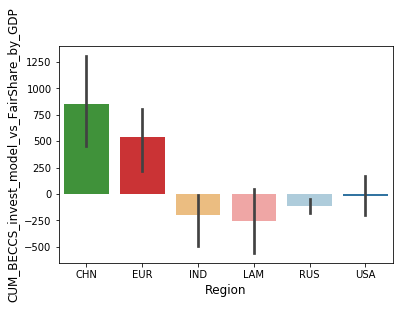

In [100]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))& (allmodels_equal_df.Year==2100)]
sns.barplot(x='Region',y='CUM_BECCS_invest_model_vs_FairShare_by_GDP' ,data=data, palette=colour_palette) #hue="Scenario"
#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
#plt.savefig(plot_path + 'Bar - Share of BECCS in 2100 by region.png', bbox_inches='tight')

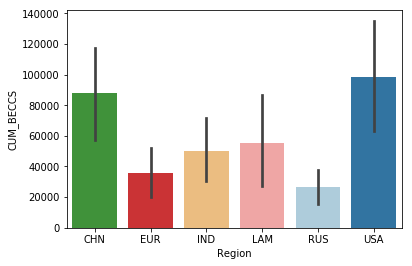

In [34]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))& (allmodels_equal_df.Year==2100)]
sns.barplot(x='Region',y='CUM_BECCS' ,data=data, palette=colour_palette) #hue="Scenario"
#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
#plt.savefig(plot_path + 'Bar - Share of BECCS in 2100 by region.png', bbox_inches='tight')

In [23]:
np.median((allmodels_equal_df.loc[(allmodels_equal_df.Region==("World"))& 
                       (allmodels_equal_df.Year==(2100))]["CUM_BECCS"].values), overwrite_input=True)

726712.6599999999

# BECCS Investment Transfer table

In [37]:
#this function basically sums up the 2100 cumulative difference between CUM_CDR according to model
# and fair share CUM_POP according to equity calculation (if difference is POSITIVE)

def total_excess_BECCS_invest_by_CUM_POP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_invest_model_vs_FairShare_by_POP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_invest_by_CUM_POP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_invest_model_vs_FairShare_by_POP'].sum()
    return(tot_exs_BECCS_invest_by_CUM_POP)

def total_excess_BECCS_invest_by_GDP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_invest_model_vs_FairShare_by_GDP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_invest_by_GDP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_invest_model_vs_FairShare_by_GDP'].sum()
    return(tot_exs_BECCS_invest_by_GDP)

In [38]:
def create_transfer_table(equity_df):
    scens=equity_df.Scenario.unique()
    transfer_df=pd.DataFrame(columns=['Scenario', 'Model', 'Unit', 'Total_transfers:by_GDP',
                                      'Total_transfers:by_CUM_POP'])  
    #transfer_df['Unit']='billion US$2005'
    transfer_df['Scenario']=scens
    transfer_df['Model']=equity_df['MODEL']
    
    for i in np.arange(0,len(scens)):
        transfer_df.loc[i,'Unit']='billion US$2005'
        transfer_df.loc[i,'Total_transfers:by_GDP']=total_excess_BECCS_invest_by_GDP(equity_df, scens[i]) #this is how much money that will be trasnferred worldwide
        transfer_df.loc[i,'Total_transfers:by_CUM_POP']=total_excess_BECCS_invest_by_CUM_POP(equity_df, scens[i]) 
        
    return transfer_df

transfer_image=create_transfer_table(equity_image)
transfer_remind=create_transfer_table(equity_remind)

def add_2100_BECCS_invest(table, equity_model):
    table['2100_CUM_BECCS_invest'] = 0
    rfilt = (equity_model.Region == 'World')
    for scen in table.Scenario.unique():
        sfilt = (equity_model.Scenario == scen)
        yfilt = (equity_model.Year == 2100)
        table.loc[(table.Scenario == scen), '2100_CUM_BECCS_invest'] = equity_model.loc[rfilt&sfilt&yfilt, 'CUM_BECCS_Investments'].values

    return table

transfer_image = add_2100_BECCS_invest(transfer_image, equity_image)
transfer_remind = add_2100_BECCS_invest(transfer_remind, equity_remind)

transfer_allmodels=pd.concat([transfer_image,transfer_remind])
transfer_allmodels.loc[:,'percentage_transfers:by_GDP'] = transfer_allmodels.loc[:,'Total_transfers:by_GDP'] / transfer_allmodels.loc[:,'2100_CUM_BECCS_invest'] 
transfer_allmodels.loc[:,'CDR not transferred:by_GDP'] = transfer_allmodels.loc[:,'2100_CUM_BECCS_invest'] - transfer_allmodels.loc[:,'Total_transfers:by_GDP']
transfer_allmodels.loc[:,'percentage_transfers:by_CUM_POP'] = transfer_allmodels.loc[:,'Total_transfers:by_CUM_POP'] / transfer_allmodels.loc[:,'2100_CUM_BECCS_invest'] 
transfer_allmodels.loc[:,'CDR not transferred:by_CUM_POP'] = transfer_allmodels.loc[:,'2100_CUM_BECCS_invest'] - transfer_allmodels.loc[:,'Total_transfers:by_CUM_POP']

transfer_allmodels


,Scenario,Model,Unit,Total_transfers:by_GDP,Total_transfers:by_CUM_POP,2100_CUM_BECCS_invest,percentage_transfers:by_GDP,CDR not transferred:by_GDP,percentage_transfers:by_CUM_POP,CDR not transferred:by_CUM_POP
0,SSP1-19-SPA0-V17,IMAGE,billion US$2005,1443.28,1634.86,4057.118780,0.355741,2613.84,0.402962,2422.25
1,SSP2-LF-SPA2-V17,IMAGE,billion US$2005,3857.3,3062.06,9950.314607,0.387656,6093.02,0.307735,6888.26
0,SSP1-19-SPA1-V17,REMIND,billion US$2005,1518.36,1993.61,4330.634000,0.35061,2812.27,0.46035,2337.03
1,SSP2-19-SPA2-V17,REMIND,billion US$2005,2411.45,1922.24,5009.908800,0.481337,2598.46,0.383688,3087.67
2,SSP1-26-SPA1-V17,REMIND,billion US$2005,433.501,831.309,1711.387000,0.253304,1277.89,0.485752,880.078
3,SSP2-26-SPA2-V17,REMIND,billion US$2005,1047.63,956.379,2110.140800,0.496475,1062.51,0.45323,1153.76
4,SSP5-19-SPA5-V17,REMIND,billion US$2005,2527.82,2219.46,4482.507600,0.563931,1954.68,0.495137,2263.05
5,SSP5-26-SPA5-V17,REMIND,billion US$2005,1263.08,1325.31,2107.327600,0.599376,844.246,0.628907,782.015


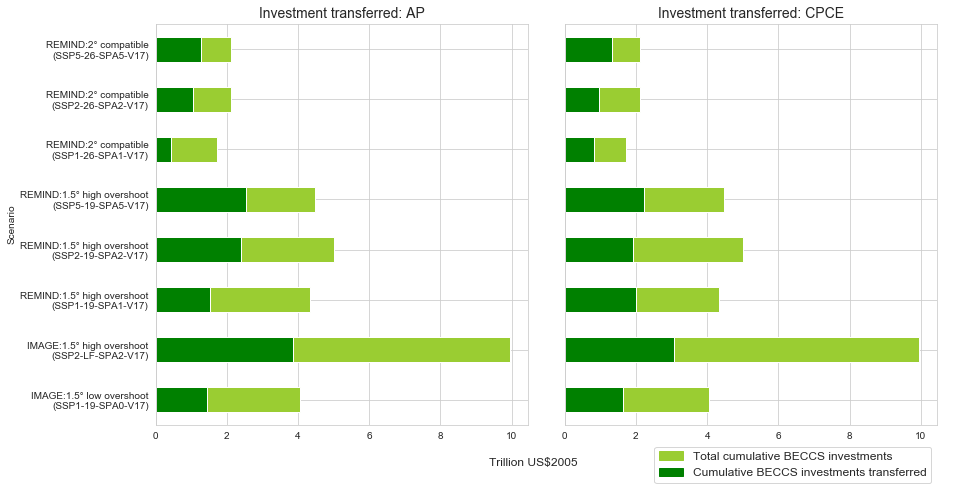

In [64]:
# table_forplot.drop(['percentage_tranfers'])
sns.set_style('whitegrid')
scen_order = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
columns_GDP = ['Scenario','Total_transfers:by_GDP','CDR not transferred:by_GDP']
columns_CUM_POP = ['Scenario','Total_transfers:by_CUM_POP','CDR not transferred:by_CUM_POP']

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharey=True)
plt.subplots_adjust(top=0.92, wspace=0.1, hspace = 0.12)
#plt.suptitle('BECCS Investments transferred by 2100', fontsize = 15)

df_forplot=transfer_allmodels.loc[:,(columns_GDP)].set_index("Scenario").loc[scen_order].reset_index()
df_forplot.loc[:,['Total_transfers:by_GDP','CDR not transferred:by_GDP']]=df_forplot.loc[:,['Total_transfers:by_GDP','CDR not transferred:by_GDP']].astype(float)*10**-3
df_forplot2=transfer_allmodels.loc[:,(columns_CUM_POP)].set_index("Scenario").loc[scen_order].reset_index()
df_forplot2.loc[:,['Total_transfers:by_CUM_POP','CDR not transferred:by_CUM_POP']]=df_forplot2.loc[:,['Total_transfers:by_CUM_POP','CDR not transferred:by_CUM_POP']].astype(float)*10**-3


#ax1=plt.bar(x='Scenario', data=df_forplot, stacked=True, ax=axes[0]).set_title('$ tranferred: by GDP', fontsize = 11)
df_forplot.plot.barh(x='Scenario', stacked=True, ax=axes[0], legend=None, color=['green','yellowgreen']).set_title('Investment transferred: AP', fontsize = 14)
df_forplot2.plot.barh(x='Scenario', stacked=True, ax=axes[1], legend=None, color=['green','yellowgreen']).set_title('Investment transferred: CPCE', fontsize = 14)


#plt.tick_params(axis='x', which='minor')
plt.ylabel(" ")
#plt.xticks(np.arange(1,13,0.5)
plt.yticks([0,1,2,3,4,5,6,7],['IMAGE:1.5° low overshoot\n(SSP1-19-SPA0-V17)','IMAGE:1.5° high overshoot\n(SSP2-LF-SPA2-V17)',
                              'REMIND:1.5° high overshoot\n(SSP1-19-SPA1-V17)','REMIND:1.5° high overshoot\n(SSP2-19-SPA2-V17)',
                          'REMIND:1.5° high overshoot\n(SSP5-19-SPA5-V17)','REMIND:2° compatible\n(SSP1-26-SPA1-V17)',
                               'REMIND:2° compatible\n(SSP2-26-SPA2-V17)','REMIND:2° compatible\n(SSP5-26-SPA5-V17)'],
           fontsize=13)

fig.text(0.5, 0.05, 'Trillion US$2005', fontsize=12, ha='center', va='center')

import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='yellowgreen', label='Total cumulative BECCS investments')
blue_patch = mpatches.Patch(color='green', label='Cumulative BECCS investments transferred')
plt.figlegend(handles=[orange_patch,blue_patch],
              loc='lower right', bbox_to_anchor=(0.93, 0), fontsize=12)

plt.savefig(plot_path + 'CUM_BECCS_invest_transfers_by_2100.png', bbox_inches='tight')

#GDP_bar=df_forplot.plot.bar(x='Scenario', y='Total_transfers:by_GDP')
#ax = table_forplot.plot.bar(stacked = True, order = scen_order)


#ax = df_forplot.set_index("Scenario").loc[scen_order].plot.bar(stacked = True)
#ax.xticks([0,1,2,3,4,5,6,7], ['RCP1.9, SSP1','RCP1.9, SSP2','RCP1.9, SSP5','RCP2.6, SSP1', 'RCP2.6, SSP2', 'RCP2.6, SSP5', 'RCP1.9, SSP1', 'LED'])

In [182]:
#corresponding table
transfer_allmodels.loc[:,['Total_transfers:by_GDP','Total_transfers:by_CUM_POP','CDR not transferred:by_GDP', 
                          'CDR not transferred:by_CUM_POP','2100_CUM_BECCS_invest']
                      ]=transfer_allmodels.loc[:,['Total_transfers:by_GDP','Total_transfers:by_CUM_POP',
                                                  'CDR not transferred:by_GDP','CDR not transferred:by_CUM_POP',
                                                  '2100_CUM_BECCS_invest']].astype(float)*10**-3
transfer_allmodels.loc[:,['percentage_transfers:by_GDP',
                          'percentage_transfers:by_CUM_POP']
                      ]= transfer_allmodels.loc[:,['percentage_transfers:by_GDP',
                                                   'percentage_transfers:by_CUM_POP']].astype(float)*100

invest_transfer_2100_table=transfer_allmodels[['Model','Scenario',
                                               'Total_transfers:by_GDP','Total_transfers:by_CUM_POP', '2100_CUM_BECCS_invest',
                                               'percentage_transfers:by_GDP','percentage_transfers:by_CUM_POP']
                                             ].copy()

In [183]:
invest_transfer_2100_table=invest_transfer_2100_table.rename(columns={'Total_transfers:by_GDP': 'Transfer by 2100: AP',
                                              'Total_transfers:by_CUM_POP': 'Transfer by 2100: CPCE',
                                            '2100_CUM_BECCS_invest':'World total 2100',
                                              'percentage_transfers:by_GDP':'%: AP', 
                                              'percentage_transfers:by_CUM_POP':'%: CPCE'
                                             })

In [184]:
invest_transfer_2100_table.insert(5, 'Unit', 'trillion US$2005')

In [188]:
invest_transfer_2100_table.loc[:,['Transfer by 2100: AP', 'Transfer by 2100: CPCE','World total 2100','%: AP','%: CPCE']
                              ]=invest_transfer_2100_table.loc[:,['Transfer by 2100: AP', 
                                                                 'Transfer by 2100: CPCE','World total 2100',
                                                                 '%: AP','%: CPCE']].round(2)

In [189]:
invest_transfer_2100_table

,Model,Scenario,Transfer by 2100: AP,Transfer by 2100: CPCE,World total 2100,Unit,%: AP,%: CPCE
0,IMAGE,SSP1-19-SPA0-V17,1.44,1.63,4.06,trillion US$2005,35.57,40.30
1,IMAGE,SSP2-LF-SPA2-V17,3.86,3.06,9.95,trillion US$2005,38.77,30.77
0,REMIND,SSP1-19-SPA1-V17,1.52,1.99,4.33,trillion US$2005,35.06,46.04
1,REMIND,SSP2-19-SPA2-V17,2.41,1.92,5.01,trillion US$2005,48.13,38.37
2,REMIND,SSP1-26-SPA1-V17,0.43,0.83,1.71,trillion US$2005,25.33,48.58
3,REMIND,SSP2-26-SPA2-V17,1.05,0.96,2.11,trillion US$2005,49.65,45.32
4,REMIND,SSP5-19-SPA5-V17,2.53,2.22,4.48,trillion US$2005,56.39,49.51
5,REMIND,SSP5-26-SPA5-V17,1.26,1.33,2.11,trillion US$2005,59.94,62.89


In [190]:
invest_transfer_2100_table.to_excel(data_path+'invest_transfer_table_2100.xls')

In [4]:
invest_transfer_2100_table=pd.read_excel(data_path+'invest_transfer_table_2100.xls')

In [10]:
invest_transfer_2100_table['%: AP'].mean()

43.605000000000004

In [11]:
invest_transfer_2100_table['%: CPCE'].mean()

45.2225

# Leakage calculation 1 (not used)
## (cumulative NE traded up until 2100 x leakage %)
BECCS amount transfer table & test for the leakage rates 10%, 20%, 30%, 40% and what amount of CO2 will be released

In [43]:
VariablesOI

['CUM_BECCS_model_vs_fair_share_by_CUM_POP',
 'CUM_BECCS_model_vs_fair_share_by_GDP',
 'CUM_BECCS_invest_model_vs_FairShare_by_POP',
 'CUM_BECCS_invest_model_vs_FairShare_by_GDP']

In [135]:
#this function basically sums up the 2100 cumulative difference between CUM_CDR according to model
# and fair share CUM_POP according to equity calculation (if difference is POSITIVE)

def total_excess_BECCS_by_CUM_POP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_model_vs_fair_share_by_CUM_POP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_by_CUM_POP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_model_vs_fair_share_by_CUM_POP'].sum()
    return(tot_exs_BECCS_by_CUM_POP)

def total_excess_BECCS_by_GDP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_BECCS_model_vs_fair_share_by_GDP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_BECCS_by_GDP = equity_df.loc[excdrfilt_POP,'CUM_BECCS_model_vs_fair_share_by_GDP'].sum()
    return(tot_exs_BECCS_by_GDP)

In [136]:
#add leakage amounts (10%-40%)
def create_BECCS_CO2_transfer_table(equity_df):
    scens=equity_df.Scenario.unique()
    transfer_df=pd.DataFrame(columns=['Scenario', 'Model', 'Unit', 'Total_transfers:by_GDP',
                                      'Total_transfers:by_CUM_POP'])  
    #transfer_df['Unit']='billion US$2005'
    transfer_df['Scenario']=scens
    transfer_df['Model']=equity_df['MODEL']
    
    for i in np.arange(0,len(scens)):
        transfer_df.loc[i,'Unit']='Mt/yr'
        transfer_df.loc[i,'Total_transfers:by_GDP']=total_excess_BECCS_by_GDP(equity_df, scens[i]) #this is how much money that will be trasnferred worldwide
        transfer_df.loc[i,'Total_transfers:by_CUM_POP']=total_excess_BECCS_by_CUM_POP(equity_df, scens[i]) 
        
    return transfer_df

BECCS_leakage_image=create_BECCS_CO2_transfer_table(equity_image)
BECCS_leakage_remind=create_BECCS_CO2_transfer_table(equity_remind)

BECCS_leakage_allmodels=pd.concat([BECCS_leakage_image,BECCS_leakage_remind])
BECCS_leakage_allmodels.loc[:,'10%_leakage:by_GDP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_GDP'] * 0.1
BECCS_leakage_allmodels.loc[:,'10%_leakage:by_CUM_POP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_CUM_POP'] * 0.1
BECCS_leakage_allmodels.loc[:,'20%_leakage:by_GDP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_GDP'] * 0.2
BECCS_leakage_allmodels.loc[:,'20%_leakage:by_CUM_POP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_CUM_POP'] * 0.2
BECCS_leakage_allmodels.loc[:,'30%_leakage:by_GDP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_GDP'] * 0.3
BECCS_leakage_allmodels.loc[:,'30%_leakage:by_CUM_POP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_CUM_POP'] * 0.3
BECCS_leakage_allmodels.loc[:,'40%_leakage:by_GDP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_GDP'] * 0.4
BECCS_leakage_allmodels.loc[:,'40%_leakage:by_CUM_POP'] = BECCS_leakage_allmodels.loc[:,'Total_transfers:by_CUM_POP'] * 0.4

BECCS_leakage_allmodels


,Scenario,Model,Unit,Total_transfers:by_GDP,Total_transfers:by_CUM_POP,10%_leakage:by_GDP,10%_leakage:by_CUM_POP,20%_leakage:by_GDP,20%_leakage:by_CUM_POP,30%_leakage:by_GDP,30%_leakage:by_CUM_POP,40%_leakage:by_GDP,40%_leakage:by_CUM_POP
0,SSP1-19-SPA0-V17,IMAGE,Mt/yr,192759,144138,19275.9,14413.8,38551.9,28827.6,57827.8,43241.3,77103.7,57655.1
1,SSP2-LF-SPA2-V17,IMAGE,Mt/yr,315034,277872,31503.4,27787.2,63006.8,55574.4,94510.2,83361.6,126014,111149
0,SSP1-19-SPA1-V17,REMIND,Mt/yr,239078,304868,23907.8,30486.8,47815.6,60973.7,71723.4,91460.5,95631.2,121947
1,SSP2-19-SPA2-V17,REMIND,Mt/yr,328216,351814,32821.6,35181.4,65643.2,70362.7,98464.7,105544,131286,140725
2,SSP1-26-SPA1-V17,REMIND,Mt/yr,161076,198098,16107.6,19809.8,32215.2,39619.5,48322.8,59429.3,64430.4,79239
3,SSP2-26-SPA2-V17,REMIND,Mt/yr,216036,241486,21603.6,24148.6,43207.2,48297.3,64810.8,72445.9,86414.5,96594.5
4,SSP5-19-SPA5-V17,REMIND,Mt/yr,422531,502704,42253.1,50270.4,84506.2,100541,126759,150811,169012,201082
5,SSP5-26-SPA5-V17,REMIND,Mt/yr,320327,385229,32032.7,38522.9,64065.4,77045.8,96098.1,115569,128131,154092


In [137]:
BECCS_leakage_allmodels.to_excel(data_path+'BECCS_leakage_method1.xls')

In [37]:
print(round((BECCS_leakage_allmodels.loc[:,'10%_leakage:by_GDP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'20%_leakage:by_GDP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'30%_leakage:by_GDP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'40%_leakage:by_GDP'].values.mean()),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'10%_leakage:by_GDP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'20%_leakage:by_GDP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'30%_leakage:by_GDP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'40%_leakage:by_GDP'].values)),2))

27438.21
54876.43
82314.64
109752.86
27705.6
55411.2
83116.8
110822.4


In [38]:
print(round((BECCS_leakage_allmodels.loc[:,'10%_leakage:by_CUM_POP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'20%_leakage:by_CUM_POP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'30%_leakage:by_CUM_POP'].values.mean()),2))
print(round((BECCS_leakage_allmodels.loc[:,'40%_leakage:by_CUM_POP'].values.mean()),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'10%_leakage:by_CUM_POP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'20%_leakage:by_CUM_POP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'30%_leakage:by_CUM_POP'].values)),2))
print(round((np.median(BECCS_leakage_allmodels.loc[:,'40%_leakage:by_CUM_POP'].values)),2))

30077.61
60155.22
90232.83
120310.44
29137.02
58274.05
87411.07
116548.1


# Delay in Global Net Zero Calculation
## find out BECCS leakage amounts from each time step and the total NE amount

In [76]:
#bc we turned all countries with no CDR responsibility to 0?
equity_remind.loc[equity_remind.Region!=("World")]['BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()
equity_remind.loc[equity_remind.Region!=("World")]['BECCS_model_vs_fair_share_by_GDP'].values.sum()


23.396899999999732

In [13]:
#make dataframes for each model: IMAGE & REMIND
#select variables needed for analysis 
remind_netzero = equity_remind[['MODEL','Region','Scenario','Year','Total_GHG','TOTAL_CDR','BECCS','CO2_Emissions',
                                'CDR_model_vs_fair_share_by_CUM_POP','CDR_model_vs_fair_share_by_GDP',
                                'BECCS_model_vs_fair_share_by_GDP', 'BECCS_model_vs_fair_share_by_CUM_POP']].copy()
image_netzero = equity_image[['MODEL','Region','Scenario','Year','Total_GHG','TOTAL_CDR','BECCS','CO2_Emissions',
                              'CDR_model_vs_fair_share_by_CUM_POP','CDR_model_vs_fair_share_by_GDP',
                              'BECCS_model_vs_fair_share_by_GDP', 'BECCS_model_vs_fair_share_by_CUM_POP']].copy()


## Cumulative per capita emissions

In [16]:
def add_BECCS_leakage(equity_df): 
    
    for scen in equity_df.Scenario.unique():
        rfilt=(equity_df.Region!='World')
        sfilt=(equity_df.Scenario==scen)
        world_filt=(equity_df.Region=='World')
        for yr in equity_df.Year.unique():    
            yrfilt=(equity_df.Year==yr)
            leakfilt_POP=(equity_df.BECCS_model_vs_fair_share_by_CUM_POP>0)&sfilt&rfilt&yrfilt
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_5%:CUM_POP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()*0.05
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_10%:CUM_POP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()*0.1
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_20%:CUM_POP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()*0.2
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_30%:CUM_POP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()*0.3
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_40%:CUM_POP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_CUM_POP'].values.sum()*0.4
    
    #subtract leakage amount from world total_CDR
    equity_df['Total_CDR-5%leakage:CUM_POP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_5%:CUM_POP']
    equity_df['Total_CDR-10%leakage:CUM_POP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_10%:CUM_POP']
    equity_df['Total_CDR-20%leakage:CUM_POP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_20%:CUM_POP']
    equity_df['Total_CDR-30%leakage:CUM_POP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_30%:CUM_POP']
    equity_df['Total_CDR-40%leakage:CUM_POP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_40%:CUM_POP']
            
    for scen in equity_df.Scenario.unique():
        rfilt=(equity_df.Region!='World')
        sfilt=(equity_df.Scenario==scen)
        world_filt=(equity_df.Region=='World')
        for yr in equity_df.Year.unique():    
            yrfilt=(equity_df.Year==yr)
            leakfilt_POP=(equity_df.BECCS_model_vs_fair_share_by_GDP>0)&sfilt&rfilt&yrfilt
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_5%:GDP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_GDP'].values.sum()*0.05
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_10%:GDP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_GDP'].values.sum()*0.1
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_20%:GDP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_GDP'].values.sum()*0.2
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_30%:GDP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_GDP'].values.sum()*0.3
            equity_df.loc[sfilt&world_filt&yrfilt,'BECCS_leakage_40%:GDP']=equity_df.loc[leakfilt_POP,'BECCS_model_vs_fair_share_by_GDP'].values.sum()*0.4
          
    #subtract leakage amount from world total_CDR  
    equity_df['Total_CDR-10%leakage:GDP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_5%:GDP']
    equity_df['Total_CDR-10%leakage:GDP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_10%:GDP']
    equity_df['Total_CDR-20%leakage:GDP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_20%:GDP']
    equity_df['Total_CDR-30%leakage:GDP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_30%:GDP']
    equity_df['Total_CDR-40%leakage:GDP']=equity_df['TOTAL_CDR']-equity_df['BECCS_leakage_40%:GDP']
   
    return equity_df.loc[equity_df.Region==('World')]


In [17]:
remind_netzero=add_BECCS_leakage(remind_netzero)
image_netzero=add_BECCS_leakage(image_netzero)
allscen_netzero=pd.concat([remind_netzero, image_netzero])
allscen_netzero

,MODEL,Region,Scenario,Year,Total_GHG,TOTAL_CDR,BECCS,CO2_Emissions,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,BECCS_model_vs_fair_share_by_GDP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_leakage_5%:CUM_POP,BECCS_leakage_10%:CUM_POP,BECCS_leakage_20%:CUM_POP,BECCS_leakage_30%:CUM_POP,BECCS_leakage_40%:CUM_POP,Total_CDR-5%leakage:CUM_POP,Total_CDR-10%leakage:CUM_POP,Total_CDR-20%leakage:CUM_POP,Total_CDR-30%leakage:CUM_POP,Total_CDR-40%leakage:CUM_POP,BECCS_leakage_5%:GDP,BECCS_leakage_10%:GDP,BECCS_leakage_20%:GDP,BECCS_leakage_30%:GDP,BECCS_leakage_40%:GDP,Total_CDR-10%leakage:GDP,Total_CDR-20%leakage:GDP,Total_CDR-30%leakage:GDP,Total_CDR-40%leakage:GDP
99,REMIND,World,SSP1-19-SPA1-V17,2020,49470.000000,690.684900,0.059800,50160.684900,-690.684900,NaN,NaN,-0.059800,0.0,0.0,0.0,0.0,0.0,690.684900,690.684900,690.684900,690.684900,690.684900,0.0,0.0,0.0,0.0,0.0,690.684900,690.684900,690.684900,690.684900
100,REMIND,World,SSP1-19-SPA1-V17,2030,37090.000000,767.087100,424.200000,37857.087100,-767.087100,NaN,NaN,-424.200000,0.0,0.0,0.0,0.0,0.0,767.087100,767.087100,767.087100,767.087100,767.087100,0.0,0.0,0.0,0.0,0.0,767.087100,767.087100,767.087100,767.087100
101,REMIND,World,SSP1-19-SPA1-V17,2040,25340.000000,3972.076700,3788.000000,29312.076700,-3972.076700,NaN,NaN,-3788.000000,0.0,0.0,0.0,0.0,0.0,3972.076700,3972.076700,3972.076700,3972.076700,3972.076700,0.0,0.0,0.0,0.0,0.0,3972.076700,3972.076700,3972.076700,3972.076700
102,REMIND,World,SSP1-19-SPA1-V17,2050,11810.000000,9838.009300,9330.000000,21648.009300,-9838.009300,NaN,NaN,-9330.000000,0.0,0.0,0.0,0.0,0.0,9838.009300,9838.009300,9838.009300,9838.009300,9838.009300,0.0,0.0,0.0,0.0,0.0,9838.009300,9838.009300,9838.009300,9838.009300
103,REMIND,World,SSP1-19-SPA1-V17,2060,854.900000,12008.173500,10940.000000,12863.073500,-12008.173500,NaN,NaN,-10940.000000,0.0,0.0,0.0,0.0,0.0,12008.173500,12008.173500,12008.173500,12008.173500,12008.173500,0.0,0.0,0.0,0.0,0.0,12008.173500,12008.173500,12008.173500,12008.173500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,IMAGE,World,SSP2-LF-SPA2-V17,2060,469.495697,15550.644907,12714.519672,16020.140604,-15550.644907,NaN,NaN,-12714.519672,0.0,0.0,0.0,0.0,0.0,15550.644907,15550.644907,15550.644907,15550.644907,15550.644907,0.0,0.0,0.0,0.0,0.0,15550.644907,15550.644907,15550.644907,15550.644907
482,IMAGE,World,SSP2-LF-SPA2-V17,2070,-1805.453979,16573.262248,13032.749408,14767.808269,-16573.262248,NaN,NaN,-13032.749408,0.0,0.0,0.0,0.0,0.0,16573.262248,16573.262248,16573.262248,16573.262248,16573.262248,0.0,0.0,0.0,0.0,0.0,16573.262248,16573.262248,16573.262248,16573.262248
483,IMAGE,World,SSP2-LF-SPA2-V17,2080,-1985.480957,16285.754279,13220.857297,14300.273322,-16285.754279,NaN,NaN,-13220.857297,0.0,0.0,0.0,0.0,0.0,16285.754279,16285.754279,16285.754279,16285.754279,16285.754279,0.0,0.0,0.0,0.0,0.0,16285.754279,16285.754279,16285.754279,16285.754279
484,IMAGE,World,SSP2-LF-SPA2-V17,2090,-2461.410889,16623.317239,13840.149817,14161.906350,-16623.317239,NaN,NaN,-13840.149817,0.0,0.0,0.0,0.0,0.0,16623.317239,16623.317239,16623.317239,16623.317239,16623.317239,0.0,0.0,0.0,0.0,0.0,16623.317239,16623.317239,16623.317239,16623.317239


In [23]:
allscen_netzero.to_excel(data_path+'allscen_netzero.xls')

# Leakage calculation 2 (USED)
##  ∫(NE traded at each time step x leakage %) 
Cumulative per capita emissions

In [24]:
#'BECCS_leakage_10%', 'BECCS_leakage_20%','BECCS_leakage_30%', 'BECCS_leakage_40%' of BECCS leakage for each time step already obtained
#adding integration over time- only world values
def integrate_BECCS_leakage(main_df):  #allscen_netzero
    main_df['CUM_BECCS_leakage_10%:CUM_POP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_10%:CUM_POP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_10%:CUM_POP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_10%:CUM_POP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_10%:CUM_POP'] += integral
    
    main_df['CUM_BECCS_leakage_20%:CUM_POP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_20%:CUM_POP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_20%:CUM_POP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_20%:CUM_POP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_20%:CUM_POP'] += integral
        
    main_df['CUM_BECCS_leakage_30%:CUM_POP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_30%:CUM_POP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_30%:CUM_POP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_30%:CUM_POP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_30%:CUM_POP'] += integral
        
    main_df['CUM_BECCS_leakage_40%:CUM_POP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_40%:CUM_POP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_40%:CUM_POP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_40%:CUM_POP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_40%:CUM_POP'] += integral
        
    main_df['CUM_BECCS_leakage_10%:GDP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_10%:GDP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_10%:GDP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_10%:GDP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_10%:GDP'] += integral
    
    main_df['CUM_BECCS_leakage_20%:GDP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_20%:GDP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_20%:GDP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_20%:GDP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_20%:GDP'] += integral
        
    main_df['CUM_BECCS_leakage_30%:GDP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_30%:GDP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_30%:GDP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_30%:GDP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_30%:GDP'] += integral
        
    main_df['CUM_BECCS_leakage_40%:GDP']=0
    for scen in main_df.Scenario.unique():
        mask_scen = main_df.Scenario == scen
        main_df.loc[(main_df.Year == 2020), 'CUM_BECCS_leakage_40%:GDP'] = main_df.loc[(main_df.Year == 2020), 'BECCS_leakage_40%:GDP']   
        integral = integrate.cumtrapz(y = main_df.loc[mask_scen,'BECCS_leakage_40%:GDP']
                                      , x = main_df.loc[mask_scen, 'Year'], initial = 0)
        main_df.loc[mask_scen,'CUM_BECCS_leakage_40%:GDP'] += integral
    return main_df

BECCS_leakage_allmodels2=integrate_BECCS_leakage(allscen_netzero)


In [21]:
BECCS_leakage_allmodels2

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_GHG,TOTAL_CDR,BECCS,CO2_Emissions,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,BECCS_model_vs_fair_share_by_GDP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_leakage_10%:CUM_POP,BECCS_leakage_20%:CUM_POP,BECCS_leakage_30%:CUM_POP,BECCS_leakage_40%:CUM_POP,Total_CDR-10%leakage:CUM_POP,Total_CDR-20%leakage:CUM_POP,Total_CDR-30%leakage:CUM_POP,Total_CDR-40%leakage:CUM_POP,BECCS_leakage_10%:GDP,BECCS_leakage_20%:GDP,BECCS_leakage_30%:GDP,BECCS_leakage_40%:GDP,Total_CDR-10%leakage:GDP,Total_CDR-20%leakage:GDP,Total_CDR-30%leakage:GDP,Total_CDR-40%leakage:GDP,CUM_BECCS_leakage_10%:CUM_POP,CUM_BECCS_leakage_20%:CUM_POP,CUM_BECCS_leakage_30%:CUM_POP,CUM_BECCS_leakage_40%:CUM_POP,CUM_BECCS_leakage_10%:GDP,CUM_BECCS_leakage_20%:GDP,CUM_BECCS_leakage_30%:GDP,CUM_BECCS_leakage_40%:GDP
0,99,REMIND,World,SSP1-19-SPA1-V17,2020,49470.000000,690.684900,0.059800,50160.684900,-690.684900,NaN,NaN,-0.059800,0.003237,0.006475,0.009712,0.012949,690.681663,690.678425,690.675188,690.671951,0.003462,0.006925,0.010387,0.013849,690.681438,690.677975,690.674513,690.671051,0.003237,0.006475,0.009712,0.012949,0.003462,0.006925,0.010387,0.013849
1,100,REMIND,World,SSP1-19-SPA1-V17,2030,37090.000000,767.087100,424.200000,37857.087100,-767.087100,NaN,NaN,-424.200000,21.016849,42.033699,63.050548,84.067398,746.070251,725.053401,704.036552,683.019702,16.008800,32.017600,48.026400,64.035200,751.078300,735.069500,719.060700,703.051900,105.100433,210.200867,315.301300,420.401734,80.061312,160.122623,240.183935,320.245246
2,101,REMIND,World,SSP1-19-SPA1-V17,2040,25340.000000,3972.076700,3788.000000,29312.076700,-3972.076700,NaN,NaN,-3788.000000,193.773709,387.547419,581.321128,775.094837,3778.302991,3584.529281,3390.755572,3196.981863,162.260000,324.520000,486.780000,649.040000,3809.816700,3647.556700,3485.296700,3323.036700,1179.053227,2358.106453,3537.159680,4716.212907,971.405312,1942.810623,2914.215935,3885.621246
3,102,REMIND,World,SSP1-19-SPA1-V17,2050,11810.000000,9838.009300,9330.000000,21648.009300,-9838.009300,NaN,NaN,-9330.000000,478.725294,957.450589,1436.175883,1914.901177,9359.284006,8880.558711,8401.833417,7923.108123,333.410000,666.820000,1000.230000,1333.640000,9504.599300,9171.189300,8837.779300,8504.369300,4541.548245,9083.096490,13624.644734,18166.192979,3449.755312,6899.510623,10349.265935,13799.021246
4,103,REMIND,World,SSP1-19-SPA1-V17,2060,854.900000,12008.173500,10940.000000,12863.073500,-12008.173500,NaN,NaN,-10940.000000,541.114154,1082.228307,1623.342461,2164.456614,11467.059346,10925.945193,10384.831039,9843.716886,411.200000,822.400000,1233.600000,1644.800000,11596.973500,11185.773500,10774.573500,10363.373500,9640.745485,19281.490969,28922.236454,38562.981938,7172.805312,14345.610623,21518.415935,28691.221246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,481,IMAGE,World,SSP2-LF-SPA2-V17,2060,469.495697,15550.644907,12714.519672,16020.140604,-15550.644907,NaN,NaN,-12714.519672,494.602287,989.204574,1483.806861,1978.409148,15056.042620,14561.440333,14066.838046,13572.235759,575.473026,1150.946051,1726.419077,2301.892102,14975.171881,14399.698856,13824.225830,13248.752804,9221.958776,18443.917553,27665.876329,36887.835106,12138.478556,24276.957112,36415.435667,48553.914223
68,482,IMAGE,World,SSP2-LF-SPA2-V17,2070,-1805.453979,16573.262248,13032.749408,14767.808269,-16573.262248,NaN,NaN,-13032.749408,489.254267,978.508535,1467.762802,1957.017070,16084.007981,15594.753713,15105.499446,14616.245178,532.704298,1065.408595,1598.112893,2130.817190,16040.557951,15507.853653,14975.149356,14442.445058,14141.241549,28282.483099,42423.724648,56564.966197,17679.365171,35358.730343,53038.095514,70717.460686
69,483,IMAGE,World,SSP2-LF-SPA2-V17,2080,-1985.480957,16285.754279,13220.857297,14300.273322,-16285.754279,NaN,NaN,-13220.857297,455.818183,911.636366,1367.454549,1823.272732,158

In [26]:
BECCS_leakage_allmodels2.to_excel(data_path+'BECCS_leakage_method2.xls')

In [22]:
#get means and medians of all scneario BECCS leakage amount 
BECCS_leakage_total_allscens=BECCS_leakage_allmodels2.loc[BECCS_leakage_allmodels2.Year==(2100)
                                                         ][['MODEL','Scenario','Year','CUM_BECCS_leakage_10%:CUM_POP',
                                                            'CUM_BECCS_leakage_20%:CUM_POP','CUM_BECCS_leakage_30%:CUM_POP',
                                                            'CUM_BECCS_leakage_40%:CUM_POP','CUM_BECCS_leakage_10%:GDP',
                                                            'CUM_BECCS_leakage_20%:GDP', 'CUM_BECCS_leakage_30%:GDP',
                                                            'CUM_BECCS_leakage_40%:GDP']].copy()


In [ ]:
BECCS_leakage_total_allscens.to_excel(data_path+'BECCS_leakage_total_allscens.xls')

In [26]:
data = [[(BECCS_leakage_total_allscens['CUM_BECCS_leakage_10%:CUM_POP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_10%:CUM_POP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_20%:CUM_POP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_20%:CUM_POP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_30%:CUM_POP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_30%:CUM_POP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_40%:CUM_POP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_40%:CUM_POP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_10%:GDP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_10%:GDP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_20%:GDP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_20%:GDP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_30%:GDP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_30%:GDP'].values)],
        [(BECCS_leakage_total_allscens['CUM_BECCS_leakage_40%:GDP'].values.mean()),
         np.median(BECCS_leakage_total_allscens['CUM_BECCS_leakage_40%:GDP'].values)]]
leakage_mean_median=pd.DataFrame(data, columns=['8 Scenario Mean','8 Scenario Median']
                                ,index=['10%: CPCE','20%: CPCE','30%: CPCE','40%: CPCE',
                                       '10%: AP','20%: AP','30%: AP','40%: AP'])
leakage_mean_median.loc[:,['8 Scenario Mean','8 Scenario Median']
                       ]=leakage_mean_median.loc[:,['8 Scenario Mean','8 Scenario Median']
                                                ].astype(float).round(2)*10**-3
leakage_mean_median['Unit']='Gt'
leakage_mean_median

,8 Scenario Mean,8 Scenario Median,Unit
10%: CPCE,30.62666,29.43783,Gt
20%: CPCE,61.25332,58.87565,Gt
30%: CPCE,91.87998,88.31348,Gt
40%: CPCE,122.50664,117.75131,Gt
10%: AP,28.46786,28.71371,Gt
20%: AP,56.93572,57.42742,Gt
30%: AP,85.40358,86.14114,Gt
40%: AP,113.87143,114.85485,Gt


In [27]:
leakage_mean_median.to_excel(data_path+'leakage_amounts_mean&median.xls')

## Compare two methods
'BECCS_leakage_allmodels' vs. 'BECCS_leakage_allmodels2' and figure out why they're different?

In [3]:
BECCS_leakage_allmodels=pd.read_excel(data_path+'BECCS_leakage_method1.xls')
BECCS_leakage_allmodels2=pd.read_excel(data_path+'BECCS_leakage_method2.xls')


In [32]:
BECCS_leakage_allmodels2.Scenario.unique()

array(['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17'], dtype=object)

In [35]:
print(BECCS_leakage_allmodels.loc[BECCS_leakage_allmodels.Scenario==('SSP2-19-SPA2-V17')]['10%_leakage:by_CUM_POP'])
#14413.8
BECCS_leakage_allmodels2.loc[(BECCS_leakage_allmodels2.Year==(2100))
                             &(BECCS_leakage_allmodels2.Scenario==('SSP2-19-SPA2-V17')),'CUM_BECCS_leakage_10%:CUM_POP']

3    35181.370104
Name: 10%_leakage:by_CUM_POP, dtype: float64


17    35261.730134
Name: CUM_BECCS_leakage_10%:CUM_POP, dtype: float64

# Delay in Net Zero Tables and Plots
## cumulative per capita emissions 

In [4]:
BECCS_leakage_allmodels2=pd.read_excel(data_path+'BECCS_leakage_method2.xls')

In [5]:
allscen_netzero_plot=BECCS_leakage_allmodels2[['MODEL','Scenario','Year','Region','Total_GHG','BECCS',
                                    'CO2_Emissions','TOTAL_CDR','BECCS_leakage_10%:CUM_POP','Total_CDR-10%leakage:CUM_POP',
                                    'BECCS_leakage_20%:CUM_POP','Total_CDR-20%leakage:CUM_POP',
                                    'BECCS_leakage_30%:CUM_POP','Total_CDR-30%leakage:CUM_POP',
                                    'BECCS_leakage_40%:CUM_POP','Total_CDR-40%leakage:CUM_POP',
                                    'BECCS_leakage_10%:GDP', 'Total_CDR-10%leakage:GDP',
                                    'BECCS_leakage_20%:GDP', 'Total_CDR-20%leakage:GDP',
                                    'BECCS_leakage_30%:GDP', 'Total_CDR-30%leakage:GDP',
                                    'BECCS_leakage_40%:GDP', 'Total_CDR-40%leakage:GDP']].copy()

# add new total_GHG (to see when we reach net zero) = CO2_Emissions - new TOTAL_CDR (positive)
allscen_netzero_plot['Total_GHG_w10%BECCS_leakage:CUM_POP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-10%leakage:CUM_POP']
allscen_netzero_plot['Total_GHG_w20%BECCS_leakage:CUM_POP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-20%leakage:CUM_POP']
allscen_netzero_plot['Total_GHG_w30%BECCS_leakage:CUM_POP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-30%leakage:CUM_POP']
allscen_netzero_plot['Total_GHG_w40%BECCS_leakage:CUM_POP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-40%leakage:CUM_POP']

allscen_netzero_plot['Total_GHG_w10%BECCS_leakage:GDP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-10%leakage:GDP']
allscen_netzero_plot['Total_GHG_w20%BECCS_leakage:GDP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-20%leakage:GDP']
allscen_netzero_plot['Total_GHG_w30%BECCS_leakage:GDP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-30%leakage:GDP']
allscen_netzero_plot['Total_GHG_w40%BECCS_leakage:GDP']=allscen_netzero_plot["CO2_Emissions"]-allscen_netzero_plot['Total_CDR-40%leakage:GDP']


In [28]:
allscen_netzero_plot#.loc[:,'Total_GHG'].values*10**-3

,MODEL,Scenario,Year,Region,Total_GHG,TOTAL_CDR,BECCS,CO2_Emissions,TOTAL_CDR,BECCS_leakage_10%:CUM_POP,Total_CDR-10%leakage:CUM_POP,BECCS_leakage_20%:CUM_POP,Total_CDR-20%leakage:CUM_POP,BECCS_leakage_30%:CUM_POP,Total_CDR-30%leakage:CUM_POP,BECCS_leakage_40%:CUM_POP,Total_CDR-40%leakage:CUM_POP,BECCS_leakage_10%:GDP,Total_CDR-10%leakage:GDP,BECCS_leakage_20%:GDP,Total_CDR-20%leakage:GDP,BECCS_leakage_30%:GDP,Total_CDR-30%leakage:GDP,BECCS_leakage_40%:GDP,Total_CDR-40%leakage:GDP,Total_GHG_w10%BECCS_leakage:CUM_POP,Total_GHG_w20%BECCS_leakage:CUM_POP,Total_GHG_w30%BECCS_leakage:CUM_POP,Total_GHG_w40%BECCS_leakage:CUM_POP,Total_GHG_w10%BECCS_leakage:GDP,Total_GHG_w20%BECCS_leakage:GDP,Total_GHG_w30%BECCS_leakage:GDP,Total_GHG_w40%BECCS_leakage:GDP
0,REMIND,SSP1-19-SPA1-V17,2020,World,49470.000000,690.684900,0.059800,50160.684900,690.684900,0.003237,690.681663,0.006475,690.678425,0.009712,690.675188,0.012949,690.671951,0.003462,690.681438,0.006925,690.677975,0.010387,690.674513,0.013849,690.671051,49470.003237,49470.006475,49470.009712,49470.012949,49470.003462,49470.006925,49470.010387,49470.013849
1,REMIND,SSP1-19-SPA1-V17,2030,World,37090.000000,767.087100,424.200000,37857.087100,767.087100,21.016849,746.070251,42.033699,725.053401,63.050548,704.036552,84.067398,683.019702,16.008800,751.078300,32.017600,735.069500,48.026400,719.060700,64.035200,703.051900,37111.016849,37132.033699,37153.050548,37174.067398,37106.008800,37122.017600,37138.026400,37154.035200
2,REMIND,SSP1-19-SPA1-V17,2040,World,25340.000000,3972.076700,3788.000000,29312.076700,3972.076700,193.773709,3778.302991,387.547419,3584.529281,581.321128,3390.755572,775.094837,3196.981863,162.260000,3809.816700,324.520000,3647.556700,486.780000,3485.296700,649.040000,3323.036700,25533.773709,25727.547419,25921.321128,26115.094837,25502.260000,25664.520000,25826.780000,25989.040000
3,REMIND,SSP1-19-SPA1-V17,2050,World,11810.000000,9838.009300,9330.000000,21648.009300,9838.009300,478.725294,9359.284006,957.450589,8880.558711,1436.175883,8401.833417,1914.901177,7923.108123,333.410000,9504.599300,666.820000,9171.189300,1000.230000,8837.779300,1333.640000,8504.369300,12288.725294,12767.450589,13246.175883,13724.901177,12143.410000,12476.820000,12810.230000,13143.640000
4,REMIND,SSP1-19-SPA1-V17,2060,World,854.900000,12008.173500,10940.000000,12863.073500,12008.173500,541.114154,11467.059346,1082.228307,10925.945193,1623.342461,10384.831039,2164.456614,9843.716886,411.200000,11596.973500,822.400000,11185.773500,1233.600000,10774.573500,1644.800000,10363.373500,1396.014154,1937.128307,2478.242461,3019.356614,1266.100000,1677.300000,2088.500000,2499.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,IMAGE,SSP2-LF-SPA2-V17,2060,World,469.495697,15550.644907,12714.519672,16020.140604,15550.644907,494.602287,15056.042620,989.204574,14561.440333,1483.806861,14066.838046,1978.409148,13572.235759,575.473026,14975.171881,1150.946051,14399.698856,1726.419077,13824.225830,2301.892102,13248.752804,964.097984,1458.700271,1953.302558,2447.904845,1044.968723,1620.441748,2195.914774,2771.387799
68,IMAGE,SSP2-LF-SPA2-V17,2070,World,-1805.453979,16573.262248,13032.749408,14767.808269,16573.262248,489.254267,16084.007981,978.508535,15594.753713,1467.762802,15105.499446,1957.017070,14616.245178,532.704298,16040.557951,1065.408595,15507.853653,1598.112893,14975.149356,2130.817190,14442.445058,-1316.199712,-826.945445,-337.691177,151.563090,-1272.749682,-740.045384,-207.341087,325.363211
69,IMAGE,SSP2-LF-SPA2-V17,2080,World,-1985.480957,16285.754279,13220.857297,14300.273322,16285.754279,455.818183,15829.936096,911.636366,15374.117913,1367.454549,14918.299730,1823.272732,14462.481547,521.510615,15764.243664,1043.021229,15242.733049,1564.531844,14721.222434,2086.042459,14199.711820,-1529.662774,-1073.844591,-618.026408,-162.208225,-1463.970342,-942.459728,-420.949113,100.561502
70,IMAGE,SSP2-LF-SPA2-V17,

In [6]:
allscen_netzero_plot.Scenario.unique()

array(['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17'], dtype=object)

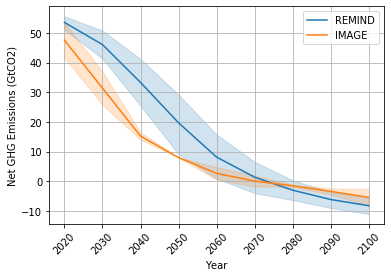

In [11]:
#model projected net zero
GHG_remind=allscen_netzero_plot.loc[allscen_netzero_plot['MODEL']==("REMIND")
                                   ][['MODEL','Scenario','Year','Region','Total_GHG','TOTAL_CDR','BECCS']].copy()
GHG_image=allscen_netzero_plot.loc[allscen_netzero_plot['MODEL']==("IMAGE")
                                  ][['MODEL','Scenario','Year','Region','Total_GHG','TOTAL_CDR','BECCS']].copy()
GHG_remind.loc[:,'Total_GHG']=GHG_remind.loc[:,'Total_GHG'].values*10**-3
GHG_image.loc[:,'Total_GHG']=GHG_image.loc[:,'Total_GHG'].values*10**-3

ax=sns.lineplot(x='Year',y='Total_GHG',data=GHG_remind, 
                #hue='Scenario', 
                label='REMIND')
ax=sns.lineplot(x='Year',y='Total_GHG',data=GHG_image, 
                #hue='Scenario',
                label='IMAGE')

ax.set(xlabel='Year', ylabel='Net GHG Emissions (GtCO2)')
plt.xticks(rotation = 45)
plt.grid(True)
#plt.suptitle('Global Net Zero Projected by Models', fontsize = 14)
plt.savefig(plot_path + 'netzero_modelled.png', dpi = 800, transparent = True, bbox_inches='tight')

Text(0.5, 0.98, 'Potential BECCS Market Leakage & Delay in Global Net Zero\n:per capita emission fair share ')

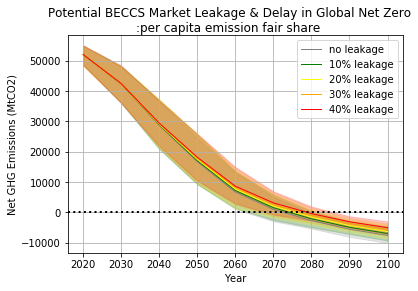

In [45]:
#delay in net zero w different amounts of leakage 

ax=sns.lineplot(x='Year',y='Total_GHG',color='gray',linewidth=1, data=allscen_netzero_plot,label='no leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w10%BECCS_leakage:CUM_POP',color='green',linewidth=1 ,data=allscen_netzero_plot,label='10% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w20%BECCS_leakage:CUM_POP',color='yellow',linewidth=1,data=allscen_netzero_plot,label='20% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w30%BECCS_leakage:CUM_POP',color='orange',linewidth=1,data=allscen_netzero_plot,label='30% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w40%BECCS_leakage:CUM_POP',color='red',linewidth=1,data=allscen_netzero_plot,label='40% leakage')
plt.axhline(linewidth=2, linestyle="dotted", color='black')
ax.set(xlabel='Year', ylabel='Net GHG Emissions (MtCO2)')
plt.grid(True)
plt.suptitle('Delay in global net zero:CPCE', fontsize = 12)
plt.savefig(plot_path + 'netzero_delay&leakages.png', dpi = 800, transparent = True, bbox_inches='tight')

Text(0.5, 0.98, 'Potential BECCS Market Leakage & Delay in Global Net Zero\n:GDP fair share ')

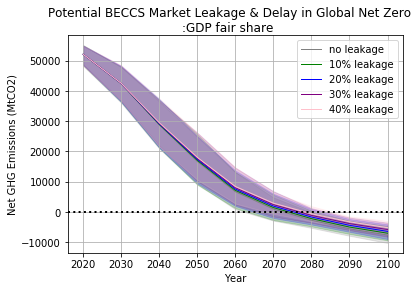

In [52]:
#delay in net zero w different amounts of leakage 
ax=sns.lineplot(x='Year',y='Total_GHG',color='gray',linewidth=1, data=allscen_netzero_plot,label='no leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w10%BECCS_leakage:GDP',color='green',linewidth=1 ,data=allscen_netzero_plot,label='10% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w20%BECCS_leakage:GDP',color='blue',linewidth=1,data=allscen_netzero_plot,label='20% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w30%BECCS_leakage:GDP',color='purple',linewidth=1,data=allscen_netzero_plot,label='30% leakage')
ax=sns.lineplot(x='Year',y='Total_GHG_w40%BECCS_leakage:GDP',color='pink',linewidth=1,data=allscen_netzero_plot,label='40% leakage')
plt.axhline(linewidth=2, linestyle="dotted", color='black')
ax.set(xlabel='Year', ylabel='Net GHG Emissions (MtCO2)')
plt.grid(True)
plt.suptitle('Potential BECCS Market Leakage & Delay in Global Net Zero\n:GDP fair share ', fontsize = 12)
#plt.savefig(plot_path + 'netzero_delay&leakages.png', dpi = 800, transparent = True, bbox_inches='tight')

In [83]:
#np.interp performs piecemeal interpolation --> use a linear function from two adjacent data points 
interp_years=allscen_netzero_plot.loc[allscen_netzero_plot.Scenario==('SSP1-26-SPA1-V17')]['Year'].values
interp_emissions=allscen_netzero_plot.loc[allscen_netzero_plot.Scenario==('SSP1-26-SPA1-V17')
                                                   ]['Total_GHG_w10%BECCS_leakage'].values
#np.interp(0,interp_emissions,interp_years)
np.interp(0, interp_emissions[::-1], interp_years[::-1])

2088.130284210842

In [12]:
def get_year_netzero(main_df, scen, leakage_rate):
    
    interp_years=main_df.loc[main_df.Scenario==(scen)]['Year'].values
    interp_emissions=main_df.loc[main_df.Scenario==(scen)][leakage_rate].values
    netzero_year=np.interp(0, interp_emissions[::-1], interp_years[::-1])
    
    return netzero_year

In [151]:
#test the function
get_year_netzero(allscen_netzero_plot, 'SSP1-26-SPA1-V17','Total_GHG_w10%BECCS_leakage')

2088.130284210842

In [13]:
def create_netzero_table(main_df):
    scens=main_df.Scenario.unique()
    netzero_df=pd.DataFrame(columns=['Model', 'Scenario', 'NetZero_w_no_leakage',
                                     'NetZero_w_10%leakage','NetZero_w_20%leakage',
                                     'NetZero_w_30%leakage','NetZero_w_40%leakage'])  
    netzero_df['Scenario']=scens
    netzero_df['Model']=['REMIND','REMIND','REMIND','REMIND','REMIND','REMIND','IMAGE','IMAGE']
    
    for i in np.arange(0,len(scens)):
        netzero_df.loc[i,'NetZero_w_no_leakage']=get_year_netzero(main_df, scens[i],'Total_GHG')
        netzero_df.loc[i,'NetZero_w_10%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w10%BECCS_leakage')
        netzero_df.loc[i,'NetZero_w_20%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w20%BECCS_leakage')
        netzero_df.loc[i,'NetZero_w_30%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w30%BECCS_leakage')
        netzero_df.loc[i,'NetZero_w_40%leakage']=get_year_netzero(main_df, scens[i],'Total_GHG_w40%BECCS_leakage')
        
    return netzero_df

In [14]:
netzero_table=create_netzero_table(allscen_netzero_plot)
netzero_table

KeyError: 'Total_GHG_w10%BECCS_leakage'

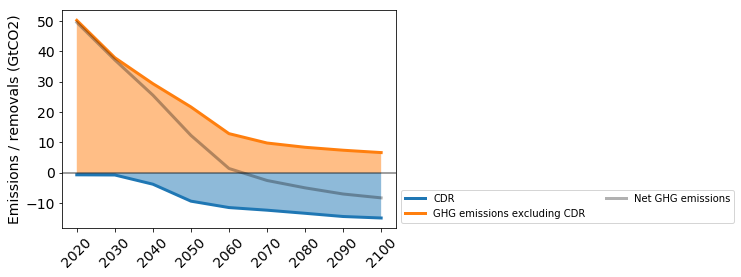

In [95]:
#to see for how long each leakage delays net zero ()
single_scen=remind_netzero_plot[remind_netzero_plot.Scenario==('SSP1-19-SPA1-V17')].copy()
single_scen.loc[:,'Total_CDR-10%leakage'] = single_scen.loc[:,'Total_CDR-10%leakage']*-10**-3
single_scen.loc[:,'Total_GHG_w10%BECCS_leakage'] = single_scen.loc[:,'Total_GHG_w10%BECCS_leakage']*10**-3
single_scen.loc[:,'CO2_Emissions'] = single_scen.loc[:,'CO2_Emissions']*10**-3

# rfilt = (mdf_remind.Country == 'World')
# mdf_remind_world = mdf_remind.loc[(mdf_remind.Year >= '1990') & rfilt].copy()
# mdf_remind_world.loc[:,'Value'] = mdf_remind_world.loc[:,'Value']*10**-3

# sns.lineplot(x = 'Year', y = 'Value', data = mdf_remind_world)

sns.lineplot(x='Year',y='Total_CDR-10%leakage',data=single_scen, linewidth = 1, label = 'CDR')
sns.lineplot(x='Year', y='CO2_Emissions',data = single_scen, linewidth = 1, label = 'GHG emissions excluding CDR')
sns.lineplot(x='Year',y='Total_GHG_w10%BECCS_leakage',data=single_scen, linewidth = 3, color = 'black', label = 'Net GHG emissions', alpha = 0.3)
plt.fill_between(np.arange(2020,2110,10), single_scen['Total_CDR-10%leakage'].values, alpha=0.5) 
plt.fill_between(np.arange(2020,2110,10), single_scen["CO2_Emissions"].values, alpha=0.5) 

# plt.line(x = np.arange(2020,2100,10), y = 0)
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
plt.ylabel('Emissions / removals (GtCO2)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("", fontsize = 14)

plt.legend(loc = 'lower left', bbox_to_anchor=(1,0),ncol=2)
# plt.legend(loc='upper right', fontsize = 14)

## GDP 

# BECCS deployment
BECCS deployment in different regions 

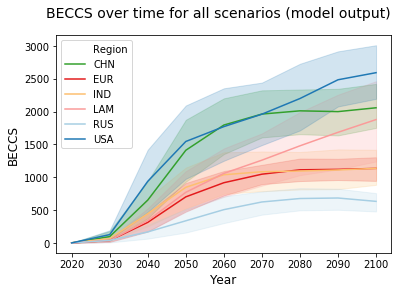

In [97]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['AFR','LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='BECCS' ,data=data, hue="Region",palette=colour_palette)
plt.suptitle('BECCS over time for all scenarios (model output)', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Least cost: BECCS over time- all scenarios.png', bbox_inches='tight')

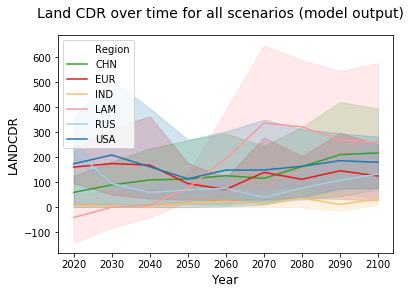

In [98]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='LANDCDR' ,data=data, hue="Region",palette=colour_palette)
plt.suptitle('Land CDR over time for all scenarios (model output)', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Least cost: Land CDR over time- all scenarios.png', bbox_inches='tight')

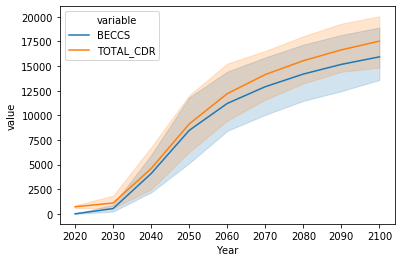

In [18]:
world_data=allmodels_equal_df[(allmodels_equal_df.Region==('World'))][['Year','BECCS','TOTAL_CDR']].copy()
                              
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(world_data, ['Year']))
plt.savefig(plot_path + 'CDR_vs_BECCS.png', bbox_inches='tight')

In [119]:
allmodels_equal_df.loc[(allmodels_equal_df.Region==('World'))&(allmodels_equal_df.Year==(2))]['BECCS'].median()

8377.5

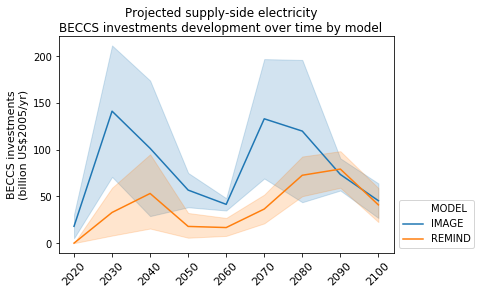

In [23]:
#Data sets: equity_remind, equity_image, allmodels_df
scen=['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17']
#yr=['2020','2030','2040','2050']
world_data=allmodels_df[(allmodels_df.Scenario.isin(scen)
                               ) & (allmodels_df.Region==('World'))].copy()

sns.lineplot(x='Year',y='BECCS_Investments',data=world_data, legend="full", hue="MODEL")
plt.ylabel('BECCS investments\n(billion US$2005/yr)', fontsize = 11)
plt.xticks(fontsize = 11, rotation = 45)
plt.xlabel("")
plt.suptitle('Projected supply-side electricity\nBECCS investments development over time by model', fontsize = 12)
plt.legend(loc = 'lower left', bbox_to_anchor=(1,0),ncol=1)
plt.savefig(plot_path + 'BECCS_invest_two_models.png', bbox_inches='tight')